<a href="https://colab.research.google.com/github/Niyati-Sinha/Machine-Learning-Predict-Customer-Delay-By-Analysing-Previous-Data-Records/blob/main/Payment_Date_Prediction_in_B2B_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODE BY: NIYATI SINHA**

**ROLL NO: 1805501**

**DARTH VANDER**

######In this notebook where ever I did some mistake or anything, mosty I have just commented that part of code rather than removing it.

######Please read the headings & comments to not what is being done by that block of code.

#**Importing Libraries and Data-Set**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re

#**Overview Of the DATA SET**

In [ ]:
''' *****************************Data Dictionary**********************

1. business_code : company code of the account
2.cust_number : customer number given to all the customers of the Account
3.name_customer : name of the customer
4.clear_date : The date on which the customer clears an invoice, or in simple terms, they
make the full payment
5.buisness_year :
6.doc_id : It is also an unique identifier of an invoice is a primary key for
acct_doc_header table
7.posting_date :
8.document_create_date : The date on which the invoice document was created
#                       * The date on which the document was created
9.document_create_date.1 :
# due_in_date : The date on which the customer is expected to clear an invoice
# invoice_currency : The currency of the invoice amount in the document for the invoice
# document type : It represents the type of document. eg D1 represents Invoice
# posting_id key : Indicator to identify whether an AR item is invoice, deduction, credit
memo based on its value. Apllicable for SAP ERP
# area_business : Business area in sap is defined as an organisationalarea within the financial
accounting module
# total_open_amount : The amount that is yet to be paid for that invoice
# baseline_create_date : The date on which the Invoice was created
# cust_payment_terms : Business terms and agreements between customers and accounts on
discounts and days of payment
# invoice_id : Unique number assigned when a seller creates an Invoice
# isOpen : Indicator of whether an invoice is open or closed. isopen = 1, means the invoice is open
'''

' *****************************Data Dictionary**********************\n\n1. business_code : company code of the account\n2.cust_number : customer number given to all the customers of the Account\n3.name_customer : name of the customer\n4.clear_date : The date on which the customer clears an invoice, or in simple terms, they\nmake the full payment\n5.buisness_year :\n6.doc_id : It is also an unique identifier of an invoice is a primary key for\nacct_doc_header table\n7.posting_date :\n8.document_create_date : The date on which the invoice document was created\n#                       * The date on which the document was created\n9.document_create_date.1 :\n# due_in_date : The date on which the customer is expected to clear an invoice\n# invoice_currency : The currency of the invoice amount in the document for the invoice\n# document type : It represents the type of document. eg D1 represents Invoice\n# posting_id key : Indicator to identify whether an AR item is invoice, deduction, credi

#**Read Data Set**

In [ ]:
#Reading 1805501.csv from My Drive and storing it as a dataframe
df=pd.read_csv(r'/content/drive/My Drive/Colab Datasets/1805501.csv')
#df

**Know your Data Set**

In [ ]:
# Returns the first 5 rows of the dataframe.
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2019-12-12 00:00:00,2019.0,1.930179e+09,2019-11-22,20191121,20191122,20191207.0,USD,RV,1.0,NaN,21594.83,20191122.0,NAH4,1.930179e+09,0
1,U001,0200769623,WAL-MAR systems,2020-02-18 00:00:00,2020.0,1.930471e+09,2020-02-05,20200203,20200205,20200220.0,USD,RV,1.0,NaN,69106.76,20200205.0,NAH4,1.930471e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-08-20 00:00:00,2019.0,1.929698e+09,2019-08-05,20190803,20190805,20190820.0,USD,RV,1.0,NaN,78218.44,20190805.0,NAH4,1.929698e+09,0
3,U001,0200772595,SAFEW llc,2019-10-30 00:00:00,2019.0,1.929796e+09,2019-08-26,20190826,20190826,20191030.0,USD,RV,1.0,NaN,3231.66,20190826.0,NAGD,1.929796e+09,0
4,U001,0200772595,SAFEW in,2019-04-02 00:00:00,2019.0,1.928976e+09,2019-03-18,20190316,20190318,20190402.0,USD,RV,1.0,NaN,2547.39,20190318.0,NAA8,1.928976e+09,0


In [ ]:
# Returns the last 5 rows of the dataframe.
df.tail()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
49995,U001,0200727272,BROOKS associates,NaN,2020.0,1.930834e+09,2020-04-28,20200428,20200428,20200513.0,USD,RV,1.0,NaN,89299.75,20200428.0,NAA8,1.930834e+09,1
49996,U001,0200744019,TARG foundation,NaN,2020.0,1.930607e+09,2020-03-07,20200305,20200307,20200322.0,USD,RV,1.0,NaN,49545.65,20200307.0,NAA8,1.930607e+09,1
49997,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930675e+09,2020-03-20,20200320,20200320,20200404.0,USD,RV,1.0,NaN,17682.72,20200320.0,NAH4,1.930675e+09,1
49998,U001,0100043936,PAPA JO llc,NaN,2020.0,1.930668e+09,2020-03-18,20200318,20200318,20200407.0,USD,RV,1.0,NaN,11102.62,20200318.0,NAD1,1.930668e+09,1
49999,U001,0200769623,WAL-MAR,NaN,2020.0,1.930653e+09,2020-03-16,20200316,20200316,20200331.0,USD,RV,1.0,NaN,22311.20,20200316.0,NAH4,1.930653e+09,1


In [ ]:
#Details of each column of the DataFrame df
#DataFrame.info() : returns information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage."""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              46904 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [ ]:
#Number of invoices that are open and closed
#invoice open means payment is yet to be done
temp = df.groupby('isOpen')['isOpen'].count().to_dict()
print(f"No. of closed invoices : {temp[0]}")
print(f"No. of open invoices : {temp[1]}")

No. of closed invoices : 46904
No. of open invoices : 3096


In [ ]:
#Number of invoices have clear_date = null
#Obviously it should be same as number of invoices that are open, still checking it to avoid any case of anomaly. 
print(f"Invoices having \"clear_date\" as Nan : {df.loc[:, 'clear_date'].isna().sum()}")

Invoices having "clear_date" as Nan : 3096


#**DATA PREPROCESSING AND SANITY CHECK**

###*Conversion of dates to datetime objects*

In [ ]:
"""
df['clear_date'] = pd.to_datetime(df['clear_date'], format='%Y%m%d %H:%M:%S')
df['posting_date'] = pd.to_datetime(df['posting_date'], format='%Y-%m-%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y-%m-%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y-%m-%d')
df['due_in_date'] = pd.to_datetime(df['due_in_date']//1, format='%Y-%m-%d')
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date']//1, format='%Y-%m-%d')
"""

"\ndf['clear_date'] = pd.to_datetime(df['clear_date'], format='%Y%m%d %H:%M:%S')\ndf['posting_date'] = pd.to_datetime(df['posting_date'], format='%Y-%m-%d')\ndf['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y-%m-%d')\ndf['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y-%m-%d')\ndf['due_in_date'] = pd.to_datetime(df['due_in_date']//1, format='%Y-%m-%d')\ndf['baseline_create_date'] = pd.to_datetime(df['baseline_create_date']//1, format='%Y-%m-%d')\n"

In [ ]:
print(df.columns) #This returns tuple 
print(type(df.columns)) #pandas index object
print("\n*****************************************************************\n")
print(df.columns.values) #This returns list of column labels of the dataFrame
print(type(df.columns.values)) #numpy array

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')
<class 'pandas.core.indexes.base.Index'>

*****************************************************************

['business_code' 'cust_number' 'name_customer' 'clear_date'
 'buisness_year' 'doc_id' 'posting_date' 'document_create_date'
 'document_create_date.1' 'due_in_date' 'invoice_currency' 'document type'
 'posting_id' 'area_business' 'total_open_amount' 'baseline_create_date'
 'cust_payment_terms' 'invoice_id' 'isOpen']
<class 'numpy.ndarray'>


In [ ]:
#column.values method returs an array of index.
print(pd.Series((df.columns.values)))

0              business_code
1                cust_number
2              name_customer
3                 clear_date
4              buisness_year
5                     doc_id
6               posting_date
7       document_create_date
8     document_create_date.1
9                due_in_date
10          invoice_currency
11             document type
12                posting_id
13             area_business
14         total_open_amount
15      baseline_create_date
16        cust_payment_terms
17                invoice_id
18                    isOpen
dtype: object


In [ ]:
#Series.str.contains() function is used to test if pattern or regex is contained within a string of a Series or Index.
#Creating a list of Columns that contain data in their column label
print(pd.Series(list(df.columns)).loc[lambda x : x.str.contains("date")])

3                 clear_date
6               posting_date
7       document_create_date
8     document_create_date.1
9                due_in_date
15      baseline_create_date
dtype: object


In [ ]:
dateFormatString = ["%Y-%m-%d", "%Y-%m-%d", "%Y%m%d", "%Y%m%d", "%Y%m%d", "%Y%m%d"]
ColumnHeadersList = list(pd.Series(list(df.columns.values)).loc[lambda x : x.str.contains("date")])
#print(ColumnHeaders)
#print(type(df['isOpen'])) # <class 'pandas.core.series.Series'>
index_dateFormatString = 0
for colName in ColumnHeadersList:
    df[colName] = pd.to_datetime(df[colName].astype(str), format = dateFormatString[index_dateFormatString]).copy()
    index_dateFormatString = index_dateFormatString + 1

df.head() 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2019-12-12,2019.0,1.930179e+09,2019-11-22,2019-11-21,2019-11-22,2019-12-07,USD,RV,1.0,NaN,21594.83,2019-11-22,NAH4,1.930179e+09,0
1,U001,0200769623,WAL-MAR systems,2020-02-18,2020.0,1.930471e+09,2020-02-05,2020-02-03,2020-02-05,2020-02-20,USD,RV,1.0,NaN,69106.76,2020-02-05,NAH4,1.930471e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-08-20,2019.0,1.929698e+09,2019-08-05,2019-08-03,2019-08-05,2019-08-20,USD,RV,1.0,NaN,78218.44,2019-08-05,NAH4,1.929698e+09,0
3,U001,0200772595,SAFEW llc,2019-10-30,2019.0,1.929796e+09,2019-08-26,2019-08-26,2019-08-26,2019-10-30,USD,RV,1.0,NaN,3231.66,2019-08-26,NAGD,1.929796e+09,0
4,U001,0200772595,SAFEW in,2019-04-02,2019.0,1.928976e+09,2019-03-18,2019-03-16,2019-03-18,2019-04-02,USD,RV,1.0,NaN,2547.39,2019-03-18,NAA8,1.928976e+09,0


##*Sanity Check*

In [ ]:
#Details of each column of the DataFrame df
#DataFrame.info() : returns information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage."""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              46904 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

In [ ]:
#checking for columns containg null values
df.isnull().any()

business_code             False
cust_number               False
name_customer             False
clear_date                 True
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
area_business              True
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                    False
dtype: bool

In [ ]:
#column headers in form of list which contain null values
df.columns[df.isna().any()].tolist()
#returns the list of those columns which contails atleast one NaN value

['clear_date', 'area_business', 'invoice_id']

In [ ]:
#Finding how many datavalues in column invoice_id is null
df['invoice_id'].isnull().sum()

6

In [ ]:
#Finding how many datavalues in column area_business is null
df['area_business'].isnull().sum()

50000

######*Dealing with column 'area_business'*

In [ ]:
df['area_business'].unique()

array([nan])

*Dropping Area_business*

In [ ]:
#As all Values are null then there is no significance of this column -> 'area_business'
#drop column
df.pop('area_business')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2019-12-12,2019.0,1.930179e+09,2019-11-22,2019-11-21,2019-11-22,2019-12-07,USD,RV,1.0,21594.83,2019-11-22,NAH4,1.930179e+09,0
1,U001,0200769623,WAL-MAR systems,2020-02-18,2020.0,1.930471e+09,2020-02-05,2020-02-03,2020-02-05,2020-02-20,USD,RV,1.0,69106.76,2020-02-05,NAH4,1.930471e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-08-20,2019.0,1.929698e+09,2019-08-05,2019-08-03,2019-08-05,2019-08-20,USD,RV,1.0,78218.44,2019-08-05,NAH4,1.929698e+09,0
3,U001,0200772595,SAFEW llc,2019-10-30,2019.0,1.929796e+09,2019-08-26,2019-08-26,2019-08-26,2019-10-30,USD,RV,1.0,3231.66,2019-08-26,NAGD,1.929796e+09,0
4,U001,0200772595,SAFEW in,2019-04-02,2019.0,1.928976e+09,2019-03-18,2019-03-16,2019-03-18,2019-04-02,USD,RV,1.0,2547.39,2019-03-18,NAA8,1.928976e+09,0


######*Dealing with null values for column 'invoice_id'*

In [ ]:
#as only 6 entries in 50000 are having invoice_id as null thus we can drop these columns to remove any case of ambiguity
#df.dropna is used to remove rows and columns with null values, by subset I have mentioned it to drop those rows which have null values in the column invoice_id
df=df.dropna(subset=['invoice_id'])

In [ ]:
#Details of each column of the DataFrame df
#DataFrame.info() : returns information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage."""
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           49994 non-null  object        
 1   cust_number             49994 non-null  object        
 2   name_customer           49994 non-null  object        
 3   clear_date              46898 non-null  datetime64[ns]
 4   buisness_year           49994 non-null  float64       
 5   doc_id                  49994 non-null  float64       
 6   posting_date            49994 non-null  datetime64[ns]
 7   document_create_date    49994 non-null  datetime64[ns]
 8   document_create_date.1  49994 non-null  datetime64[ns]
 9   due_in_date             49994 non-null  datetime64[ns]
 10  invoice_currency        49994 non-null  object        
 11  document type           49994 non-null  object        
 12  posting_id              49994 non-null  float6

#**Train, Test, Validation Split**

####*Spliting Train & Test on the basis of clear_date*

In [ ]:
dfTest = df[df.loc[:, "clear_date"].isna() == True] #clear_date column value is null means payment to be made
dfcopyTest=dfTest.copy()
dfTrain = df[df.loc[:, "clear_date"].isna() == False] #clear_date column value is non-null means payment already done

In [ ]:
#dfcopyTest

####*Test DataFrame*

In [ ]:
#DataFrame.info() : returns information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage."""
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3096 entries, 46904 to 49999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           3096 non-null   object        
 1   cust_number             3096 non-null   object        
 2   name_customer           3096 non-null   object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           3096 non-null   float64       
 5   doc_id                  3096 non-null   float64       
 6   posting_date            3096 non-null   datetime64[ns]
 7   document_create_date    3096 non-null   datetime64[ns]
 8   document_create_date.1  3096 non-null   datetime64[ns]
 9   due_in_date             3096 non-null   datetime64[ns]
 10  invoice_currency        3096 non-null   object        
 11  document type           3096 non-null   object        
 12  posting_id              3096 non-null   flo

In [ ]:
dfTest.shape

(3096, 18)

In [ ]:
dfTest.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
46904,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930622e+09,2020-03-09,2020-03-08,2020-03-09,2020-03-24,USD,RV,1.0,14396.96,2020-03-09,NAH4,1.930622e+09,1
46905,U001,0200729942,SA systems,NaT,2020.0,1.930810e+09,2020-04-21,2020-04-21,2020-04-21,2020-05-06,USD,RV,1.0,11629.96,2020-04-21,NAA8,1.930810e+09,1
46906,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930711e+09,2020-03-29,2020-03-28,2020-03-29,2020-04-13,USD,RV,1.0,355.93,2020-03-29,NAH4,1.930711e+09,1
46907,U001,0200418007,AM foundation,NaT,2020.0,1.930717e+09,2020-03-29,2020-03-28,2020-03-29,2020-06-02,USD,RV,1.0,7263.36,2020-03-29,NAGD,1.930717e+09,1
46908,U001,0200794332,COST associates,NaT,2020.0,1.930595e+09,2020-03-04,2020-03-03,2020-03-04,2020-03-19,USD,RV,1.0,39259.89,2020-03-04,NAAX,1.930595e+09,1


####*dfTrain DataFrame*

This will be further split into:
1.   dfTrain
2.   dfVal



In [ ]:
#DataFrame.info() : returns information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage."""
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46898 entries, 0 to 46903
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           46898 non-null  object        
 1   cust_number             46898 non-null  object        
 2   name_customer           46898 non-null  object        
 3   clear_date              46898 non-null  datetime64[ns]
 4   buisness_year           46898 non-null  float64       
 5   doc_id                  46898 non-null  float64       
 6   posting_date            46898 non-null  datetime64[ns]
 7   document_create_date    46898 non-null  datetime64[ns]
 8   document_create_date.1  46898 non-null  datetime64[ns]
 9   due_in_date             46898 non-null  datetime64[ns]
 10  invoice_currency        46898 non-null  object        
 11  document type           46898 non-null  object        
 12  posting_id              46898 non-null  float6

In [ ]:
dfTrain.shape

(46898, 18)

In [ ]:
dfTrain.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2019-12-12,2019.0,1.930179e+09,2019-11-22,2019-11-21,2019-11-22,2019-12-07,USD,RV,1.0,21594.83,2019-11-22,NAH4,1.930179e+09,0
1,U001,0200769623,WAL-MAR systems,2020-02-18,2020.0,1.930471e+09,2020-02-05,2020-02-03,2020-02-05,2020-02-20,USD,RV,1.0,69106.76,2020-02-05,NAH4,1.930471e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-08-20,2019.0,1.929698e+09,2019-08-05,2019-08-03,2019-08-05,2019-08-20,USD,RV,1.0,78218.44,2019-08-05,NAH4,1.929698e+09,0
3,U001,0200772595,SAFEW llc,2019-10-30,2019.0,1.929796e+09,2019-08-26,2019-08-26,2019-08-26,2019-10-30,USD,RV,1.0,3231.66,2019-08-26,NAGD,1.929796e+09,0
4,U001,0200772595,SAFEW in,2019-04-02,2019.0,1.928976e+09,2019-03-18,2019-03-16,2019-03-18,2019-04-02,USD,RV,1.0,2547.39,2019-03-18,NAA8,1.928976e+09,0


####*Spliting dfTrain into Train DataSet and Validation DataSet*


In [ ]:
"""For splitting into train and val2 
splitting should be done on the basis of date as it will include the trends w.r.t time of occurence and season"""


"""On the basis of Dataset values it is not possible to clearly differentiate among the columns 'posting_date','document_create_date','document_create_date.1' and 'baseline_create_date'
so first check that whether they are duplicates or not."""

"On the basis of Dataset values it is not possible to clearly differentiate among the columns 'posting_date','document_create_date','document_create_date.1' and 'baseline_create_date'\nso first check that whether they are duplicates or not."

######*Comparing columns 'posting_date', 'document_create_date', 'document_create_date.1' and 'baseline_create_date' are duplicate or not*

In [ ]:
#df temp is a temporary DataFrame made out of only four columns of the train DataSet
dfTemp = dfTrain[["document_create_date.1", "baseline_create_date", "document_create_date", "posting_date"]]
print(dfTemp)
dfTemp = dfTemp.T #DataFrame.T is done for transpose
print(dfTemp)

      document_create_date.1  ... posting_date
0                 2019-11-22  ...   2019-11-22
1                 2020-02-05  ...   2020-02-05
2                 2019-08-05  ...   2019-08-05
3                 2019-08-26  ...   2019-08-26
4                 2019-03-18  ...   2019-03-18
...                      ...  ...          ...
46899             2020-01-06  ...   2020-01-06
46900             2019-04-06  ...   2019-04-06
46901             2019-07-18  ...   2019-07-18
46902             2019-09-24  ...   2019-09-24
46903             2020-02-11  ...   2020-02-11

[46898 rows x 4 columns]
                            0          1      ...      46902      46903
document_create_date.1 2019-11-22 2020-02-05  ... 2019-09-24 2020-02-11
baseline_create_date   2019-11-22 2020-02-05  ... 2019-09-16 2020-02-11
document_create_date   2019-11-21 2020-02-03  ... 2019-09-24 2020-02-10
posting_date           2019-11-22 2020-02-05  ... 2019-09-24 2020-02-11

[4 rows x 46898 columns]


In [ ]:
"""DataFrame.duplicated() checks for duplicate values and returns boolean values,
 return false if it is the first occurance and 
 return true if it is the duplicate occurance (other than first occurance)"""

temp = dfTemp.duplicated().to_dict()
print(temp,end='\n\n')
for key in temp:
    print(f"{key:22} : Not Duplicate") if temp[key] == False else print(f"{key:22} : Duplicate")

dfTemp = dfTemp.T # again transposing dfTemp

{'document_create_date.1': False, 'baseline_create_date': False, 'document_create_date': False, 'posting_date': True}

document_create_date.1 : Not Duplicate
baseline_create_date   : Not Duplicate
document_create_date   : Not Duplicate
posting_date           : Duplicate


*Drop Duplicate Column*

In [ ]:
#dfTemp

In [ ]:
#Now dropping Duplicate Column
dfTemp.pop('posting_date')
dfTrain.pop('posting_date')
dfTest.pop('posting_date')
dfTrain.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,2019-12-12,2019.0,1.930179e+09,2019-11-21,2019-11-22,2019-12-07,USD,RV,1.0,21594.83,2019-11-22,NAH4,1.930179e+09,0
1,U001,0200769623,WAL-MAR systems,2020-02-18,2020.0,1.930471e+09,2020-02-03,2020-02-05,2020-02-20,USD,RV,1.0,69106.76,2020-02-05,NAH4,1.930471e+09,0
2,U001,0200769623,WAL-MAR foundation,2019-08-20,2019.0,1.929698e+09,2019-08-03,2019-08-05,2019-08-20,USD,RV,1.0,78218.44,2019-08-05,NAH4,1.929698e+09,0
3,U001,0200772595,SAFEW llc,2019-10-30,2019.0,1.929796e+09,2019-08-26,2019-08-26,2019-10-30,USD,RV,1.0,3231.66,2019-08-26,NAGD,1.929796e+09,0
4,U001,0200772595,SAFEW in,2019-04-02,2019.0,1.928976e+09,2019-03-16,2019-03-18,2019-04-02,USD,RV,1.0,2547.39,2019-03-18,NAA8,1.928976e+09,0


In [ ]:
dfTrain.shape

(46898, 17)

In [ ]:
dfTemp.columns

Index(['document_create_date.1', 'baseline_create_date',
       'document_create_date'],
      dtype='object')

*Check Correlation*

In [ ]:
"""To find that according to which DataFrame we should split the train and validation dataset
checking how related are these three columns : 
1: document_create_date.1, 
2: baseline_create_date, 
3: document_create_date """

'To find that according to which DataFrame we should split the train and validation dataset\nchecking how related are these three columns : \n1: document_create_date.1, \n2: baseline_create_date, \n3: document_create_date '

In [ ]:
"""The describe() method is used for calculating some statistical data like percentile, mean and standard deviation
 of the numerical values of the Series or DataFrame. 
It analyzes both numeric and object series and also the DataFrame column sets of mixed data types."""
dfTemp.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future b

,document_create_date.1,baseline_create_date,document_create_date
count,46898,46898,46898
unique,425,435,429
top,2019-04-03 00:00:00,2019-03-01 00:00:00,2019-02-26 00:00:00
freq,200,246,197
first,2018-12-30 00:00:00,2018-11-19 00:00:00,2018-12-26 00:00:00
last,2020-02-27 00:00:00,2020-03-15 00:00:00,2020-02-28 00:00:00


In [ ]:
#Correlation cannot be found on datetime objects so instead of using date we can use day number by choosing a specific startdate
#choosing the earliest first date among all three columns
#To see first date among all three columns refer the cell above where we have used the df.describe() 

In [ ]:
startDate= datetime.datetime(2018, 11, 19) #from baseline_create_date column
print(startDate)

2018-11-19 00:00:00


In [ ]:
dfTemp['dayNumber_document_create_date.1'] = (dfTemp['document_create_date.1'] - startDate).dt.days
dfTemp['dayNumber_document_create_date'] = (dfTemp['document_create_date'] - startDate).dt.days
dfTemp['dayNumber_baseline_create_date'] = (dfTemp['baseline_create_date'] - startDate).dt.days
dfTemp.head()

,document_create_date.1,baseline_create_date,document_create_date,dayNumber_document_create_date.1,dayNumber_document_create_date,dayNumber_baseline_create_date
0,2019-11-22,2019-11-22,2019-11-21,368,367,368
1,2020-02-05,2020-02-05,2020-02-03,443,441,443
2,2019-08-05,2019-08-05,2019-08-03,259,257,259
3,2019-08-26,2019-08-26,2019-08-26,280,280,280
4,2019-03-18,2019-03-18,2019-03-16,119,117,119


In [ ]:
#Calculating Correlation
print("Correlation Matrix : ")
dfTemp[["dayNumber_document_create_date.1", "dayNumber_document_create_date", "dayNumber_baseline_create_date"]].corr()

Correlation Matrix : 


,dayNumber_document_create_date.1,dayNumber_document_create_date,dayNumber_baseline_create_date
dayNumber_document_create_date.1,1.000000,0.999917,0.999790
dayNumber_document_create_date,0.999917,1.000000,0.999704
dayNumber_baseline_create_date,0.999790,0.999704,1.000000


In [ ]:
#All correlation Matrix values are approximately 1, thus all three columns are very highly correlated
#Thus futher spliting into train and vaidation can be done by choosing any one of the three columns
#1: document_create_date.1, 2: baseline_create_date, 3: document_create_date

#I am choosing document_create_date.1 for further spliting

#splitting data into train and validation in 88% and 12% respectively
from sklearn.model_selection import train_test_split
dfTrain, dfValidation = train_test_split(dfTrain, test_size=0.15)

*Training DataSet*

In [ ]:
dfTrain.describe()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen
count,39863.000000,3.986300e+04,39863.0,39863.000000,3.986300e+04,39863.0
mean,2019.132178,2.010701e+09,1.0,32019.048336,2.010701e+09,0.0
std,0.338688,2.756608e+08,0.0,39803.341344,2.756608e+08,0.0
min,2019.000000,1.928502e+09,1.0,0.530000,1.928502e+09,0.0
25%,2019.000000,1.929176e+09,1.0,4792.545000,1.929176e+09,0.0
50%,2019.000000,1.929732e+09,1.0,17169.900000,1.929732e+09,0.0
75%,2019.000000,1.930208e+09,1.0,46128.650000,1.930208e+09,0.0
max,2020.000000,2.960618e+09,1.0,860880.000000,2.960618e+09,0.0


In [ ]:
dfTrain.shape

(39863, 17)

In [ ]:
dfTrain.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
23300,U001,0200797452,US,2019-03-20,2019.0,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,USD,RV,1.0,55632.23,2019-02-26,NAD1,1.928860e+09,0
2929,CA02,0140105686,SYSC foundation,2019-12-19,2019.0,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,CAD,RV,1.0,42295.53,2019-12-05,CA10,2.960597e+09,0
35992,U001,0200705742,DOT co,2019-12-03,2019.0,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,USD,RV,1.0,38198.66,2019-11-18,NAA8,1.930166e+09,0
6702,U001,0200881076,ALBERT associates,2020-01-17,2020.0,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,USD,RV,1.0,86230.75,2020-01-02,NAA8,1.930347e+09,0
327,U001,0200486270,BAR llc,2019-08-14,2019.0,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,USD,RV,1.0,4660.00,2019-07-30,NAA8,1.929651e+09,0


In [ ]:
#DataFrame.info() : returns information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage."""
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39863 entries, 23300 to 28039
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39863 non-null  object        
 1   cust_number             39863 non-null  object        
 2   name_customer           39863 non-null  object        
 3   clear_date              39863 non-null  datetime64[ns]
 4   buisness_year           39863 non-null  float64       
 5   doc_id                  39863 non-null  float64       
 6   document_create_date    39863 non-null  datetime64[ns]
 7   document_create_date.1  39863 non-null  datetime64[ns]
 8   due_in_date             39863 non-null  datetime64[ns]
 9   invoice_currency        39863 non-null  object        
 10  document type           39863 non-null  object        
 11  posting_id              39863 non-null  float64       
 12  total_open_amount       39863 non-null  fl

In [ ]:
dfValidation.shape

(7035, 17)

####*Resetting index of all DataFrames*


In [ ]:
dfTrain.reset_index(drop = True, inplace = True)
dfValidation.reset_index(drop = True, inplace = True)
dfTest.reset_index(drop = True, inplace = True)

In [ ]:
dfTrain.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200797452,US,2019-03-20,2019.0,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,USD,RV,1.0,55632.23,2019-02-26,NAD1,1.928860e+09,0
1,CA02,0140105686,SYSC foundation,2019-12-19,2019.0,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,CAD,RV,1.0,42295.53,2019-12-05,CA10,2.960597e+09,0
2,U001,0200705742,DOT co,2019-12-03,2019.0,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,USD,RV,1.0,38198.66,2019-11-18,NAA8,1.930166e+09,0
3,U001,0200881076,ALBERT associates,2020-01-17,2020.0,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,USD,RV,1.0,86230.75,2020-01-02,NAA8,1.930347e+09,0
4,U001,0200486270,BAR llc,2019-08-14,2019.0,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,USD,RV,1.0,4660.00,2019-07-30,NAA8,1.929651e+09,0


In [ ]:
dfValidation.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U013,0100046487,PAPA JOH systems,2019-04-29,2019.0,1.991825e+09,2019-04-04,2019-04-04,2019-04-29,USD,RV,1.0,16508.00,2019-04-04,NA25,1.991825e+09,0
1,U001,0200762301,C&S WH corporation,2019-07-05,2019.0,1.929514e+09,2019-06-18,2019-06-20,2019-07-05,USD,RV,1.0,5322.71,2019-06-20,NAC6,1.929514e+09,0
2,U001,0200704858,WAKE associates,2019-05-29,2019.0,1.929301e+09,2019-05-12,2019-05-13,2019-05-28,USD,RV,1.0,71108.88,2019-05-13,NAA8,1.929301e+09,0
3,U001,0200769623,WAL-MAR corp,2019-08-29,2019.0,1.929761e+09,2019-08-19,2019-08-18,2019-09-02,USD,RV,1.0,1414.68,2019-08-18,NAH4,1.929761e+09,0
4,U001,0200726025,MARTI,2019-08-01,2019.0,1.929660e+09,2019-07-25,2019-07-24,2019-08-08,USD,RV,1.0,52450.48,2019-07-24,NAA8,1.929660e+09,0


In [ ]:
dfTest.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930622e+09,2020-03-08,2020-03-09,2020-03-24,USD,RV,1.0,14396.96,2020-03-09,NAH4,1.930622e+09,1
1,U001,0200729942,SA systems,NaT,2020.0,1.930810e+09,2020-04-21,2020-04-21,2020-05-06,USD,RV,1.0,11629.96,2020-04-21,NAA8,1.930810e+09,1
2,U001,0200769623,WAL-MAR associates,NaT,2020.0,1.930711e+09,2020-03-28,2020-03-29,2020-04-13,USD,RV,1.0,355.93,2020-03-29,NAH4,1.930711e+09,1
3,U001,0200418007,AM foundation,NaT,2020.0,1.930717e+09,2020-03-28,2020-03-29,2020-06-02,USD,RV,1.0,7263.36,2020-03-29,NAGD,1.930717e+09,1
4,U001,0200794332,COST associates,NaT,2020.0,1.930595e+09,2020-03-03,2020-03-04,2020-03-19,USD,RV,1.0,39259.89,2020-03-04,NAAX,1.930595e+09,1


#**EDA**

###**Exploratory data analysis**

####*Checking columns for unique elements to know the constant features*

In [ ]:
dfTrain.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [ ]:
dfTrain.business_code.unique()
#mixed feature

array(['U001', 'CA02', 'U013', 'U002', 'U005', 'U007'], dtype=object)

In [ ]:
dfTrain.cust_number.unique()
#mixed feature

array(['0200797452', '0140105686', '0200705742', ..., '100036172',
       '0200342745', '0200387015'], dtype=object)

In [ ]:
dfTrain.name_customer.unique()
#string

array(['US  ', 'SYSC foundation', 'DOT co', ..., 'COLDST associates',
       'DUTCH  llc', 'TOUC corporation'], dtype=object)

In [ ]:
dfTrain.buisness_year.unique()
#float

array([2019., 2020.])

In [ ]:
dfTrain.doc_id.unique()
#double

array([1.92886043e+09, 2.96059705e+09, 1.93016567e+09, ...,
       1.92969092e+09, 1.92877840e+09, 1.92876274e+09])

In [ ]:
dfTrain.invoice_currency.unique()
#currency -> str

array(['USD', 'CAD'], dtype=object)

In [ ]:
#dfTrain.document type.unique() -> error as label contains space
df['document type'].unique()

array(['RV'], dtype=object)

In [ ]:
dfTrain.total_open_amount.unique()

array([ 55632.23,  42295.53,  38198.66, ..., 112119.02,   3033.43,
       140357.39])

In [ ]:
dfTrain.cust_payment_terms.unique()

array(['NAD1', 'CA10', 'NAA8', 'NAC6', 'NAH4', 'NABG', 'NAM4', 'NAM2',
       'NACB', 'NAX2', 'NAVF', 'NAAX', 'NA10', 'NAU5', 'NA32', 'NAD5',
       'NATL', 'NAG2', 'NAWP', 'NAGD', 'NAM1', 'NAVE', 'NAVM', 'NAWU',
       'NAVL', 'NAWN', 'NAAW', 'NAB1', 'NA3F', 'C106', 'NAUP', 'NAVQ',
       'NAUZ', 'NAVR', 'NA3B', 'CA30', 'BR56', 'NA9X', 'NAVD', 'NA8Q',
       'NATU', 'NA84', 'NATX', 'NA38', 'NATZ', 'NAUI', 'NAD8', 'NATW',
       'NAUX', 'NA25', 'NAD4', '90M7', 'CAB1', 'NAV9', 'NATJ', 'NA31',
       'B112', 'NANC', 'NAVC', 'B052', 'NABD', 'NATK', 'NACE', 'CA60',
       'NAM3', 'CAX2', 'NAWM', 'NA24', 'BR12', 'NATV', 'NATM'],
      dtype=object)

In [ ]:
dfTrain.invoice_id.unique()

array([1.92886043e+09, 2.96059705e+09, 1.93016567e+09, ...,
       1.92969092e+09, 1.92877840e+09, 1.92876274e+09])

In [ ]:
dfTrain.isOpen.unique()

array([0])

In [ ]:
dfTrain.posting_id.unique()
#float

array([1.])

#**Feature Engineering**

####*Handling categorical features*

######*Identifying Mixed features*


In [ ]:
dfTrain.info()
#We have to identify mixed features from columns having Dtype = object as all others are specified of specific Dtype

'''
Columns to consider for mixed features:
 0   business_code  
 1   cust_number 
 2   name_customer   
 9   invoice_currency  
 10  document type
 13  cust_payment_terms    '''

 #to check for mixed values check for unique() values in these columns done under the sub-header 'Checking columns for unique elements to know the constant features' of EDA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39863 entries, 0 to 39862
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39863 non-null  object        
 1   cust_number             39863 non-null  object        
 2   name_customer           39863 non-null  object        
 3   clear_date              39863 non-null  datetime64[ns]
 4   buisness_year           39863 non-null  float64       
 5   doc_id                  39863 non-null  float64       
 6   document_create_date    39863 non-null  datetime64[ns]
 7   document_create_date.1  39863 non-null  datetime64[ns]
 8   due_in_date             39863 non-null  datetime64[ns]
 9   invoice_currency        39863 non-null  object        
 10  document type           39863 non-null  object        
 11  posting_id              39863 non-null  float64       
 12  total_open_amount       39863 non-null  float6

'\nColumns to consider for mixed features:\n 0   business_code  \n 1   cust_number \n 2   name_customer   \n 9   invoice_currency  \n 10  document type\n 13  cust_payment_terms    '

In [ ]:
#Mixed features means features containing more than one dataType
dfTrain.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200797452,US,2019-03-20,2019.0,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,USD,RV,1.0,55632.23,2019-02-26,NAD1,1.928860e+09,0
1,CA02,0140105686,SYSC foundation,2019-12-19,2019.0,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,CAD,RV,1.0,42295.53,2019-12-05,CA10,2.960597e+09,0
2,U001,0200705742,DOT co,2019-12-03,2019.0,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,USD,RV,1.0,38198.66,2019-11-18,NAA8,1.930166e+09,0
3,U001,0200881076,ALBERT associates,2020-01-17,2020.0,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,USD,RV,1.0,86230.75,2020-01-02,NAA8,1.930347e+09,0
4,U001,0200486270,BAR llc,2019-08-14,2019.0,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,USD,RV,1.0,4660.00,2019-07-30,NAA8,1.929651e+09,0


In [ ]:
#by refering to the unique values in the identified columns mentioned in the first comment of this sub heading
#mixed variable clearly visible: business_code, cust_payment_terms 
#mixed varable not so clearly visible: cust_number

######*business_code*

In [ ]:
dfTrain["business_code"].unique()
#first char part either U or CA
#second int part

array(['U001', 'CA02', 'U013', 'U002', 'U005', 'U007'], dtype=object)

In [ ]:
def businessCodeDealing(dataf):
    #seperate string part from business_code and replace U by 0 and CA by 1(for one hot encoding to be implemented)

    dataf.loc[dataf["business_code"].str.contains("^U") == True , "business_code_str_part"] = 0
    dataf.loc[dataf["business_code"].str.contains("^CA") == True , "business_code_str_part"] = 1

    dataf["business_code"] = dataf["business_code"].apply(lambda x : int(x[2:]))
    dataf.rename(columns = {"business_code" : "business_code_int_part"}, inplace = True)
    return dataf

In [ ]:
dfTrain = businessCodeDealing(dfTrain.copy())
dfTest = businessCodeDealing(dfTest.copy())
dfValidation = businessCodeDealing(dfValidation.copy())

In [ ]:
dfTrain.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_str_part
0,1,0200797452,US,2019-03-20,2019.0,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,USD,RV,1.0,55632.23,2019-02-26,NAD1,1.928860e+09,0,0.0
1,2,0140105686,SYSC foundation,2019-12-19,2019.0,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,CAD,RV,1.0,42295.53,2019-12-05,CA10,2.960597e+09,0,1.0
2,1,0200705742,DOT co,2019-12-03,2019.0,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,USD,RV,1.0,38198.66,2019-11-18,NAA8,1.930166e+09,0,0.0
3,1,0200881076,ALBERT associates,2020-01-17,2020.0,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,USD,RV,1.0,86230.75,2020-01-02,NAA8,1.930347e+09,0,0.0
4,1,0200486270,BAR llc,2019-08-14,2019.0,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,USD,RV,1.0,4660.00,2019-07-30,NAA8,1.929651e+09,0,0.0


In [ ]:
dfTest.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_str_part
0,1,0200769623,WAL-MAR associates,NaT,2020.0,1.930622e+09,2020-03-08,2020-03-09,2020-03-24,USD,RV,1.0,14396.96,2020-03-09,NAH4,1.930622e+09,1,0.0
1,1,0200729942,SA systems,NaT,2020.0,1.930810e+09,2020-04-21,2020-04-21,2020-05-06,USD,RV,1.0,11629.96,2020-04-21,NAA8,1.930810e+09,1,0.0
2,1,0200769623,WAL-MAR associates,NaT,2020.0,1.930711e+09,2020-03-28,2020-03-29,2020-04-13,USD,RV,1.0,355.93,2020-03-29,NAH4,1.930711e+09,1,0.0
3,1,0200418007,AM foundation,NaT,2020.0,1.930717e+09,2020-03-28,2020-03-29,2020-06-02,USD,RV,1.0,7263.36,2020-03-29,NAGD,1.930717e+09,1,0.0
4,1,0200794332,COST associates,NaT,2020.0,1.930595e+09,2020-03-03,2020-03-04,2020-03-19,USD,RV,1.0,39259.89,2020-03-04,NAAX,1.930595e+09,1,0.0


In [ ]:
dfValidation.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_str_part
0,13,0100046487,PAPA JOH systems,2019-04-29,2019.0,1.991825e+09,2019-04-04,2019-04-04,2019-04-29,USD,RV,1.0,16508.00,2019-04-04,NA25,1.991825e+09,0,0.0
1,1,0200762301,C&S WH corporation,2019-07-05,2019.0,1.929514e+09,2019-06-18,2019-06-20,2019-07-05,USD,RV,1.0,5322.71,2019-06-20,NAC6,1.929514e+09,0,0.0
2,1,0200704858,WAKE associates,2019-05-29,2019.0,1.929301e+09,2019-05-12,2019-05-13,2019-05-28,USD,RV,1.0,71108.88,2019-05-13,NAA8,1.929301e+09,0,0.0
3,1,0200769623,WAL-MAR corp,2019-08-29,2019.0,1.929761e+09,2019-08-19,2019-08-18,2019-09-02,USD,RV,1.0,1414.68,2019-08-18,NAH4,1.929761e+09,0,0.0
4,1,0200726025,MARTI,2019-08-01,2019.0,1.929660e+09,2019-07-25,2019-07-24,2019-08-08,USD,RV,1.0,52450.48,2019-07-24,NAA8,1.929660e+09,0,0.0


One Hot Encoding

In [ ]:
#oneHotEncoding the business_code_string_Part
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [ ]:
enc_df = pd.DataFrame(encoder.fit_transform(dfTrain[["business_code_str_part"]]).toarray())
enc_df = enc_df.rename(columns = {0 : "business_code_str_part_U", 1 : "business_code_str_part_CA"})
dfTrain = dfTrain.join(enc_df).drop(columns = ["business_code_str_part"])

In [ ]:
def encoding(dataf, encoder):
    enc_df = pd.DataFrame(encoder.transform(dataf[["business_code_str_part"]]).toarray())
    enc_df = enc_df.rename(columns = {0 : "business_code_str_part_U", 1 : "business_code_str_part_CA"})
    dataf = dataf.join(enc_df).drop(columns = ["business_code_str_part"])
    return dataf

In [ ]:
dfValidation = encoding(dfValidation, encoder)
dfTest = encoding(dfTest, encoder)

#oneHotEncoding the business_code_string_Part Successfull

In [ ]:
dfTrain.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_str_part_U,business_code_str_part_CA
0,1,0200797452,US,2019-03-20,2019.0,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,USD,RV,1.0,55632.23,2019-02-26,NAD1,1.928860e+09,0,1.0,0.0
1,2,0140105686,SYSC foundation,2019-12-19,2019.0,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,CAD,RV,1.0,42295.53,2019-12-05,CA10,2.960597e+09,0,0.0,1.0
2,1,0200705742,DOT co,2019-12-03,2019.0,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,USD,RV,1.0,38198.66,2019-11-18,NAA8,1.930166e+09,0,1.0,0.0
3,1,0200881076,ALBERT associates,2020-01-17,2020.0,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,USD,RV,1.0,86230.75,2020-01-02,NAA8,1.930347e+09,0,1.0,0.0
4,1,0200486270,BAR llc,2019-08-14,2019.0,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,USD,RV,1.0,4660.00,2019-07-30,NAA8,1.929651e+09,0,1.0,0.0


In [ ]:
dfTest.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_str_part_U,business_code_str_part_CA
0,1,0200769623,WAL-MAR associates,NaT,2020.0,1.930622e+09,2020-03-08,2020-03-09,2020-03-24,USD,RV,1.0,14396.96,2020-03-09,NAH4,1.930622e+09,1,1.0,0.0
1,1,0200729942,SA systems,NaT,2020.0,1.930810e+09,2020-04-21,2020-04-21,2020-05-06,USD,RV,1.0,11629.96,2020-04-21,NAA8,1.930810e+09,1,1.0,0.0
2,1,0200769623,WAL-MAR associates,NaT,2020.0,1.930711e+09,2020-03-28,2020-03-29,2020-04-13,USD,RV,1.0,355.93,2020-03-29,NAH4,1.930711e+09,1,1.0,0.0
3,1,0200418007,AM foundation,NaT,2020.0,1.930717e+09,2020-03-28,2020-03-29,2020-06-02,USD,RV,1.0,7263.36,2020-03-29,NAGD,1.930717e+09,1,1.0,0.0
4,1,0200794332,COST associates,NaT,2020.0,1.930595e+09,2020-03-03,2020-03-04,2020-03-19,USD,RV,1.0,39259.89,2020-03-04,NAAX,1.930595e+09,1,1.0,0.0


In [ ]:
dfValidation.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_str_part_U,business_code_str_part_CA
0,13,0100046487,PAPA JOH systems,2019-04-29,2019.0,1.991825e+09,2019-04-04,2019-04-04,2019-04-29,USD,RV,1.0,16508.00,2019-04-04,NA25,1.991825e+09,0,1.0,0.0
1,1,0200762301,C&S WH corporation,2019-07-05,2019.0,1.929514e+09,2019-06-18,2019-06-20,2019-07-05,USD,RV,1.0,5322.71,2019-06-20,NAC6,1.929514e+09,0,1.0,0.0
2,1,0200704858,WAKE associates,2019-05-29,2019.0,1.929301e+09,2019-05-12,2019-05-13,2019-05-28,USD,RV,1.0,71108.88,2019-05-13,NAA8,1.929301e+09,0,1.0,0.0
3,1,0200769623,WAL-MAR corp,2019-08-29,2019.0,1.929761e+09,2019-08-19,2019-08-18,2019-09-02,USD,RV,1.0,1414.68,2019-08-18,NAH4,1.929761e+09,0,1.0,0.0
4,1,0200726025,MARTI,2019-08-01,2019.0,1.929660e+09,2019-07-25,2019-07-24,2019-08-08,USD,RV,1.0,52450.48,2019-07-24,NAA8,1.929660e+09,0,1.0,0.0


######*cust_payment_terms*

In [ ]:
dfTrain["cust_payment_terms"].unique()
#sometimes set of characters (alpha) followed by int
#sometimes all characters (alpha)
#sometimes int part followed by set of characters

array(['NAD1', 'CA10', 'NAA8', 'NAC6', 'NAH4', 'NABG', 'NAM4', 'NAM2',
       'NACB', 'NAX2', 'NAVF', 'NAAX', 'NA10', 'NAU5', 'NA32', 'NAD5',
       'NATL', 'NAG2', 'NAWP', 'NAGD', 'NAM1', 'NAVE', 'NAVM', 'NAWU',
       'NAVL', 'NAWN', 'NAAW', 'NAB1', 'NA3F', 'C106', 'NAUP', 'NAVQ',
       'NAUZ', 'NAVR', 'NA3B', 'CA30', 'BR56', 'NA9X', 'NAVD', 'NA8Q',
       'NATU', 'NA84', 'NATX', 'NA38', 'NATZ', 'NAUI', 'NAD8', 'NATW',
       'NAUX', 'NA25', 'NAD4', '90M7', 'CAB1', 'NAV9', 'NATJ', 'NA31',
       'B112', 'NANC', 'NAVC', 'B052', 'NABD', 'NATK', 'NACE', 'CA60',
       'NAM3', 'CAX2', 'NAWM', 'NA24', 'BR12', 'NATV', 'NATM'],
      dtype=object)

In [ ]:
"""column 'cust_payment_terms' cannot be segregated into integers and alphabetical part
thus one hot encoding seems to be not possible
so, encode it directly"""

"column 'cust_payment_terms' cannot be segregated into integers and alphabetical part\nthus one hot encoding seems to be not possible\nso, encode it directly"

In [ ]:
#Done in the sub Heading Mean Encoding cust_payment_terms later

######*invoice_currency*

In [ ]:
dfTrain["invoice_currency"].unique()

array(['USD', 'CAD'], dtype=object)

In [ ]:
#Calculating percentage of train set that uses USD and CAD as currency
print(f' USD = {(dfTrain[dfTrain["invoice_currency"] == "USD"].shape[0] / dfTrain.shape[0])*100} % of total dfTrain')
print(f' CSD = {100- (dfTrain[dfTrain["invoice_currency"] == "USD"].shape[0] / dfTrain.shape[0])*100} % of total dfTrain')

 USD = 92.23590798484811 % of total dfTrain
 CSD = 7.764092015151888 % of total dfTrain


In [ ]:
#As the data is split into significant amounts of data thus the lower frequesncy of CSD cannot be ignored
#It would have been possible to ignore it if it was somewhere arund 1% or even lesser
print(f' No of data-entries having USD as invoice_currency {dfTrain[dfTrain["invoice_currency"] == "USD"].shape[0]}')
print(f' No of data-entries having CAD as invoice_currency {dfTrain[dfTrain["invoice_currency"] == "CAD"].shape[0]}')

 No of data-entries having USD as invoice_currency 36768
 No of data-entries having CAD as invoice_currency 3095


In [ ]:
dfTrain.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_str_part_U,business_code_str_part_CA
0,1,0200797452,US,2019-03-20,2019.0,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,USD,RV,1.0,55632.23,2019-02-26,NAD1,1.928860e+09,0,1.0,0.0
1,2,0140105686,SYSC foundation,2019-12-19,2019.0,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,CAD,RV,1.0,42295.53,2019-12-05,CA10,2.960597e+09,0,0.0,1.0
2,1,0200705742,DOT co,2019-12-03,2019.0,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,USD,RV,1.0,38198.66,2019-11-18,NAA8,1.930166e+09,0,1.0,0.0
3,1,0200881076,ALBERT associates,2020-01-17,2020.0,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,USD,RV,1.0,86230.75,2020-01-02,NAA8,1.930347e+09,0,1.0,0.0
4,1,0200486270,BAR llc,2019-08-14,2019.0,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,USD,RV,1.0,4660.00,2019-07-30,NAA8,1.929651e+09,0,1.0,0.0


In [ ]:
#As my data shows most of the  transactions are done in USD so using USD as Standard mode of payment
##2019's Average exchange rate : 1 CAD = 0.753598 USD
#	Canadian Dollar to US Dollar exchange rate as on Sunday 31 January 2021	is 1 CAD = 0.78102 USD

def currencyConverter(dataf):
    #converting CAD to USD

    #converting total_open_amount to USD wherever invoice_currency is 'CAD'
    dataf.loc[dataf.loc[:, "invoice_currency"] == "CAD", "total_open_amount"] = dataf.loc[dataf.loc[:, "invoice_currency"] == "CAD", "total_open_amount"].apply(lambda x : 0.78102 * x)
    
    #after converting total_open_amount to USD wherever invoice_currency is 'CAD' changing the invoice_currenct to USD
    dataf.loc[dataf.loc[:, "invoice_currency"] == "CAD", "invoice_currency"] = "USD"
    return dataf

In [ ]:
dfTrain = currencyConverter(dfTrain.copy())
dfTest = currencyConverter(dfTest.copy())
dfValidation = currencyConverter(dfValidation.copy())

In [ ]:
dfTrain.invoice_currency.unique(), dfTest.invoice_currency.unique(), dfValidation.invoice_currency.unique()
#constant feature

(array(['USD'], dtype=object),
 array(['USD'], dtype=object),
 array(['USD'], dtype=object))

In [ ]:
dfTrain.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_str_part_U,business_code_str_part_CA
0,1,0200797452,US,2019-03-20,2019.0,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,USD,RV,1.0,55632.230000,2019-02-26,NAD1,1.928860e+09,0,1.0,0.0
1,2,0140105686,SYSC foundation,2019-12-19,2019.0,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,USD,RV,1.0,33033.654841,2019-12-05,CA10,2.960597e+09,0,0.0,1.0
2,1,0200705742,DOT co,2019-12-03,2019.0,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,USD,RV,1.0,38198.660000,2019-11-18,NAA8,1.930166e+09,0,1.0,0.0
3,1,0200881076,ALBERT associates,2020-01-17,2020.0,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,USD,RV,1.0,86230.750000,2020-01-02,NAA8,1.930347e+09,0,1.0,0.0
4,1,0200486270,BAR llc,2019-08-14,2019.0,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,USD,RV,1.0,4660.000000,2019-07-30,NAA8,1.929651e+09,0,1.0,0.0


######*Mean Encoding cust_payment_terms*

In [ ]:
#creating a mapper function to map "cust_payment_terms" column's values to respective mean
temp = dfTrain[["cust_payment_terms", "total_open_amount"]]
meanMapper = temp.groupby("cust_payment_terms")["total_open_amount"].mean().to_dict()
print(meanMapper)
meanMapper = {key : round(value, 2) for key, value in meanMapper.items()}
print(meanMapper)

#meanMapper is the mapper dictionary

{'90M7': 65476.075000000004, 'B052': 41346.96, 'B112': 56921.04, 'BR12': 73415.875, 'BR56': 38216.036363636355, 'C106': 23802.83692307692, 'CA10': 44592.91983107252, 'CA30': 54087.42533815384, 'CA60': 3443.7436758000003, 'CAB1': 10898.70922512, 'CAX2': 16.5420036, 'NA10': 31063.97169971675, 'NA24': 1028.5, 'NA25': 16508.0, 'NA31': 758.4, 'NA32': 21751.571249999997, 'NA38': 54011.69083333334, 'NA3B': 19510.065405405403, 'NA3F': 20701.706666666665, 'NA84': 34865.10071428571, 'NA8Q': 38970.327999999994, 'NA9X': 9148.881666666666, 'NAA8': 36979.71962772923, 'NAAW': 17223.287210526305, 'NAAX': 24163.871987447666, 'NAB1': 21264.417142857143, 'NABD': 42411.6, 'NABG': 35047.10199999999, 'NAC6': 51876.69152108427, 'NACB': 20706.572608695653, 'NACE': 17429.21, 'NAD1': 23190.899609079483, 'NAD4': 42063.75388888888, 'NAD5': 42239.211781250015, 'NAD8': 81929.31666666667, 'NAG2': 24524.976459466816, 'NAGD': 13366.283644366193, 'NAH4': 23273.763328622637, 'NAM1': 14679.959878048769, 'NAM2': 13367.774

In [ ]:
def meanEncoding(dataf):
    dataf.loc[:, "cust_payment_terms"] = dataf.loc[:, "cust_payment_terms"].map(lambda x : meanMapper.get(x, 0))
    return dataf.copy()


In [ ]:
dfTrain = meanEncoding(dfTrain)
dfTest = meanEncoding(dfTest)
dfValidation = meanEncoding(dfValidation)

#mean encoding the cust_payment_terms

In [ ]:
pd.set_option('display.max_columns', None)

dfTrain.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_str_part_U,business_code_str_part_CA
0,1,0200797452,US,2019-03-20,2019.0,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,USD,RV,1.0,55632.230000,2019-02-26,23190.90,1.928860e+09,0,1.0,0.0
1,2,0140105686,SYSC foundation,2019-12-19,2019.0,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,USD,RV,1.0,33033.654841,2019-12-05,44592.92,2.960597e+09,0,0.0,1.0
2,1,0200705742,DOT co,2019-12-03,2019.0,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,USD,RV,1.0,38198.660000,2019-11-18,36979.72,1.930166e+09,0,1.0,0.0
3,1,0200881076,ALBERT associates,2020-01-17,2020.0,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,USD,RV,1.0,86230.750000,2020-01-02,36979.72,1.930347e+09,0,1.0,0.0
4,1,0200486270,BAR llc,2019-08-14,2019.0,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,USD,RV,1.0,4660.000000,2019-07-30,36979.72,1.929651e+09,0,1.0,0.0


In [ ]:
dfTrain.shape

(39863, 19)

######*document type*

In [ ]:
temp = dfTrain.copy()
temp["document type"].unique()
#constant feature as far as train dataset is considered

array(['RV'], dtype=object)

#**EDA**  ( continued )

In [ ]:
dfTrain.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_str_part_U,business_code_str_part_CA
0,1,0200797452,US,2019-03-20,2019.0,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,USD,RV,1.0,55632.230000,2019-02-26,23190.90,1.928860e+09,0,1.0,0.0
1,2,0140105686,SYSC foundation,2019-12-19,2019.0,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,USD,RV,1.0,33033.654841,2019-12-05,44592.92,2.960597e+09,0,0.0,1.0
2,1,0200705742,DOT co,2019-12-03,2019.0,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,USD,RV,1.0,38198.660000,2019-11-18,36979.72,1.930166e+09,0,1.0,0.0
3,1,0200881076,ALBERT associates,2020-01-17,2020.0,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,USD,RV,1.0,86230.750000,2020-01-02,36979.72,1.930347e+09,0,1.0,0.0
4,1,0200486270,BAR llc,2019-08-14,2019.0,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,USD,RV,1.0,4660.000000,2019-07-30,36979.72,1.929651e+09,0,1.0,0.0


In [ ]:
temp=dfTrain.copy()
temp.describe()

,business_code_int_part,buisness_year,doc_id,posting_id,total_open_amount,cust_payment_terms,invoice_id,isOpen,business_code_str_part_U,business_code_str_part_CA
count,39863.000000,39863.000000,3.986300e+04,39863.0,39863.000000,39863.000000,3.986300e+04,39863.0,39863.000000,39863.000000
mean,1.252189,2019.132178,2.010701e+09,1.0,31053.383581,31053.382863,2.010701e+09,0.0,0.922384,0.077616
std,1.436738,0.338688,2.756608e+08,0.0,37315.783616,10927.658994,2.756608e+08,0.0,0.267569,0.267569
min,1.000000,2019.000000,1.928502e+09,1.0,0.530000,16.540000,1.928502e+09,0.0,0.000000,0.000000
25%,1.000000,2019.000000,1.929176e+09,1.0,4686.300000,23273.760000,1.929176e+09,0.0,1.000000,0.000000
50%,1.000000,2019.000000,1.929732e+09,1.0,16957.180000,36979.720000,1.929732e+09,0.0,1.000000,0.000000
75%,1.000000,2019.000000,1.930208e+09,1.0,45497.590000,36979.720000,1.930208e+09,0.0,1.000000,0.000000
max,13.000000,2020.000000,2.960618e+09,1.0,860880.000000,96701.770000,2.960618e+09,0.0,1.000000,1.000000


In [ ]:
temp["clear_date_month"] = temp["clear_date"].dt.month
temp["clear_date_year"] = temp["clear_date"].dt.year
temp["doc_create_date_month"] = temp["document_create_date.1"].dt.month
temp["doc_create_date_year"] = temp["document_create_date.1"].dt.year

temp["paid_on_or_before_due_date"] = np.where(temp.apply(lambda x : x["clear_date"] <= x["due_in_date"], axis = 1) == True, 1, 0)

In [ ]:
temp.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,business_code_str_part_U,business_code_str_part_CA,clear_date_month,clear_date_year,doc_create_date_month,doc_create_date_year,paid_on_or_before_due_date
0,1,0200797452,US,2019-03-20,2019.0,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,USD,RV,1.0,55632.230000,2019-02-26,23190.90,1.928860e+09,0,1.0,0.0,3,2019,2,2019,0
1,2,0140105686,SYSC foundation,2019-12-19,2019.0,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,USD,RV,1.0,33033.654841,2019-12-05,44592.92,2.960597e+09,0,0.0,1.0,12,2019,11,2019,0
2,1,0200705742,DOT co,2019-12-03,2019.0,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,USD,RV,1.0,38198.660000,2019-11-18,36979.72,1.930166e+09,0,1.0,0.0,12,2019,11,2019,1
3,1,0200881076,ALBERT associates,2020-01-17,2020.0,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,USD,RV,1.0,86230.750000,2020-01-02,36979.72,1.930347e+09,0,1.0,0.0,1,2020,1,2020,1
4,1,0200486270,BAR llc,2019-08-14,2019.0,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,USD,RV,1.0,4660.000000,2019-07-30,36979.72,1.929651e+09,0,1.0,0.0,8,2019,7,2019,1


In [ ]:
temp["payment_delay_days"] = temp["clear_date"].sub(temp["due_in_date"]).dt.days.copy()

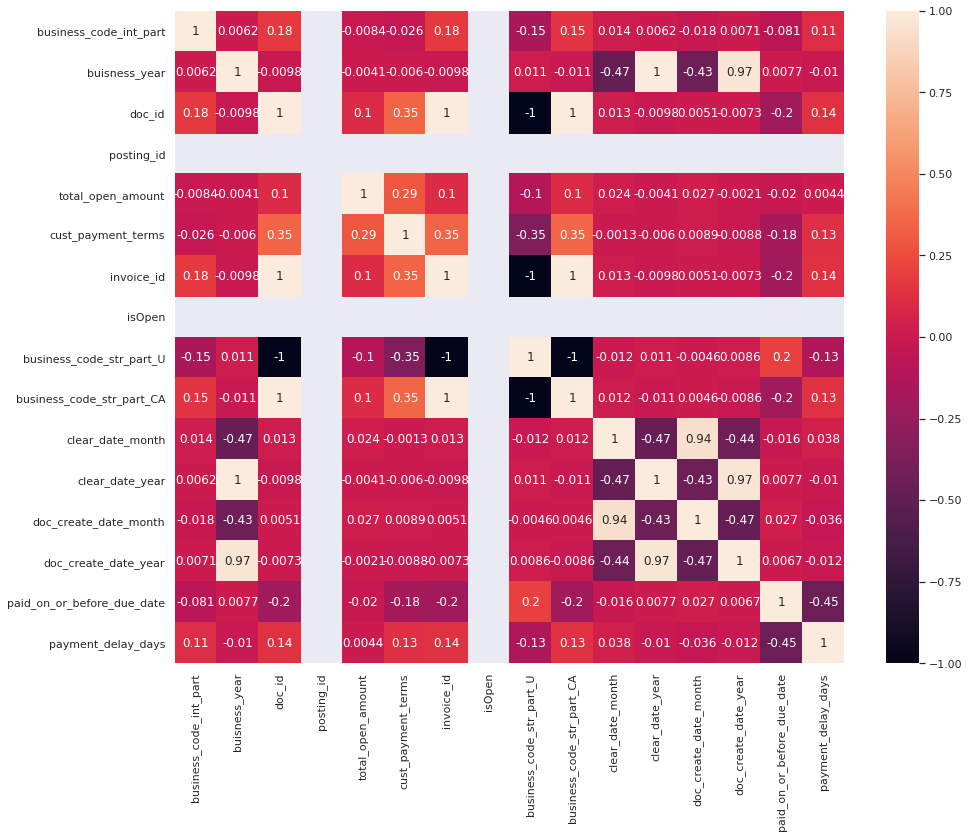

In [ ]:
sns.set(rc={'figure.figsize':(15,12)})
sns.heatmap(temp.corr(), annot = True)

###*Constant Feature Removal*

In [ ]:
"""Constant features are the type of features that contain only one value for all the outputs in the dataset.
 Constant features provide no information that can help in classification of the record at hand.
Therefore, it is advisable to remove all the constant features from the dataset."""

#Removing constant features as they don't provide any useful information to a machine learning model to predict a target feature.

'Constant features are the type of features that contain only one value for all the outputs in the dataset.\n Constant features provide no information that can help in classification of the record at hand.\nTherefore, it is advisable to remove all the constant features from the dataset.'

In [ ]:
def constFeatureCheck(dataf):
    print("No. of unique values in each feature :\n")
    constFeatures = []
    for item in dataf.columns.values:
        uniqueItems = len(dataf[item].unique())
        print(f"{item:22} : {uniqueItems} ")
        if(uniqueItems == 1):
            constFeatures.append(item)
    return constFeatures

constFeaturesDataTrain = constFeatureCheck(dfTrain)
print(f"\nList of constant features in dataTrain: {constFeaturesDataTrain}")

No. of unique values in each feature :

business_code_int_part : 5 
cust_number            : 1353 
name_customer          : 3905 
clear_date             : 390 
buisness_year          : 2 
doc_id                 : 39863 
document_create_date   : 429 
document_create_date.1 : 425 
due_in_date            : 493 
invoice_currency       : 1 
document type          : 1 
posting_id             : 1 
total_open_amount      : 36238 
baseline_create_date   : 434 
cust_payment_terms     : 71 
invoice_id             : 39863 
isOpen                 : 1 
business_code_str_part_U : 2 
business_code_str_part_CA : 2 

List of constant features in dataTrain: ['invoice_currency', 'document type', 'posting_id', 'isOpen']


#### Removing constant columns of train set from all the datasets

In [ ]:
dfTrain = dfTrain.drop(columns = constFeaturesDataTrain).copy()
dfValidation = dfValidation.drop(columns = constFeaturesDataTrain).copy()
dfTest = dfTest.drop(columns = constFeaturesDataTrain).copy()

In [ ]:
dfTrain.head()

,business_code_int_part,cust_number,name_customer,clear_date,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,business_code_str_part_U,business_code_str_part_CA
0,1,0200797452,US,2019-03-20,2019.0,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,55632.230000,2019-02-26,23190.90,1.928860e+09,1.0,0.0
1,2,0140105686,SYSC foundation,2019-12-19,2019.0,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,33033.654841,2019-12-05,44592.92,2.960597e+09,0.0,1.0
2,1,0200705742,DOT co,2019-12-03,2019.0,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,38198.660000,2019-11-18,36979.72,1.930166e+09,1.0,0.0
3,1,0200881076,ALBERT associates,2020-01-17,2020.0,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,86230.750000,2020-01-02,36979.72,1.930347e+09,1.0,0.0
4,1,0200486270,BAR llc,2019-08-14,2019.0,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,4660.000000,2019-07-30,36979.72,1.929651e+09,1.0,0.0


In [ ]:
dfTrain.shape

(39863, 15)

### *Quasi - Constant Removal*

In [ ]:
"""Quasi-constant features, as the name suggests, are the features that are almost constant. 
In other words, these features have the same values for a very large subset of the output"""

'Quasi-constant features, as the name suggests, are the features that are almost constant. \nIn other words, these features have the same values for a very large subset of the output'

In [ ]:
#The features having very small variance values have very negligible use for a machine learning model
#to predict the target feature
#thus removing them

In [ ]:
def quasiConstFeatureCheck(dataf, threshold = 1.0):
    print("No. of unique values in each feature :\n")
    quasiConstFeatures = []
    for item in dataf.columns.values:
        uniqueItems = len(dataf[item].unique())
        percentage = (uniqueItems / dataf.shape[0]) * 100
        print(f"{item:28} : {uniqueItems:5} : {percentage:.2f}%")
        if(percentage <= threshold):
            quasiConstFeatures.append(item)
    return quasiConstFeatures

#considering those features as quasi-constant which have less than 0.1% of distinct records
quasiConstFeaturesDataTrain = quasiConstFeatureCheck(dfTrain, 0.1)
print(f"\nList of quasi-constant features in dataTrain:\n{quasiConstFeaturesDataTrain}")

No. of unique values in each feature :

business_code_int_part       :     5 : 0.01%
cust_number                  :  1353 : 3.39%
name_customer                :  3905 : 9.80%
clear_date                   :   390 : 0.98%
buisness_year                :     2 : 0.01%
doc_id                       : 39863 : 100.00%
document_create_date         :   429 : 1.08%
document_create_date.1       :   425 : 1.07%
due_in_date                  :   493 : 1.24%
total_open_amount            : 36238 : 90.91%
baseline_create_date         :   434 : 1.09%
cust_payment_terms           :    71 : 0.18%
invoice_id                   : 39863 : 100.00%
business_code_str_part_U     :     2 : 0.01%
business_code_str_part_CA    :     2 : 0.01%

List of quasi-constant features in dataTrain:
['business_code_int_part', 'buisness_year', 'business_code_str_part_U', 'business_code_str_part_CA']


In [ ]:
#Out of these 4 features 'business_code_int_part', 'buisness_year', 'business_code_str_part_U', 'business_code_str_part_CA'
#only 'buisness_year' seems suitable to be dropped


######Removing Quasi-Constant columns of train set from all the datasets

In [ ]:
dfTrain = dfTrain.drop(columns = "buisness_year").copy()
dfValidation = dfValidation.drop(columns = "buisness_year").copy()
dfTest = dfTest.drop(columns = "buisness_year").copy()

In [ ]:
dfTrain.head()

,business_code_int_part,cust_number,name_customer,clear_date,doc_id,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,business_code_str_part_U,business_code_str_part_CA
0,1,0200797452,US,2019-03-20,1.928860e+09,2019-02-26,2019-02-26,2019-03-18,55632.230000,2019-02-26,23190.90,1.928860e+09,1.0,0.0
1,2,0140105686,SYSC foundation,2019-12-19,2.960597e+09,2019-11-30,2019-11-30,2019-12-15,33033.654841,2019-12-05,44592.92,2.960597e+09,0.0,1.0
2,1,0200705742,DOT co,2019-12-03,1.930166e+09,2019-11-18,2019-11-18,2019-12-03,38198.660000,2019-11-18,36979.72,1.930166e+09,1.0,0.0
3,1,0200881076,ALBERT associates,2020-01-17,1.930347e+09,2020-01-03,2020-01-02,2020-01-17,86230.750000,2020-01-02,36979.72,1.930347e+09,1.0,0.0
4,1,0200486270,BAR llc,2019-08-14,1.929651e+09,2019-07-23,2019-07-30,2019-08-14,4660.000000,2019-07-30,36979.72,1.929651e+09,1.0,0.0


In [ ]:
dfTrain.shape

(39863, 14)

In [ ]:
dfTrain.columns

Index(['business_code_int_part', 'cust_number', 'name_customer', 'clear_date',
       'doc_id', 'document_create_date', 'document_create_date.1',
       'due_in_date', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'invoice_id', 'business_code_str_part_U',
       'business_code_str_part_CA'],
      dtype='object')

###*Checking for duplicate columns*

In [ ]:
#From observation: Possible groups of duplicate features can be:
#1. ("doc_id", "invoice_id")
#2. ("document_create_date.1", "baseline_create_date", "document_create_date")
"""
but group 2 has already been checked 
under the heading 'Comparing columns 'posting_date', 'document_create_date', 'document_create_date.1' and 'baseline_create_date' are duplicate or not' 
with "posting_date"

So, we need to check only group1

"""


'\nbut group 2 has already been checked \nunder the heading \'Comparing columns \'posting_date\', \'document_create_date\', \'document_create_date.1\' and \'baseline_create_date\' are duplicate or not\' \nwith "posting_date"\n\nSo, we need to check only group1\n\n'

####Group1

In [ ]:
#Checking for 1st group:
temp = dfTrain[["doc_id", "invoice_id"]]
#print(temp)

temp = temp.T
#print(temp)

zz = temp.duplicated().to_dict()
print(zz)

for key in zz:
    print(f"{key:22} : Not Duplicate") if zz[key] == False else print(f"{key:22} : Duplicate")

temp = temp.T # again transposing dfTemp

{'doc_id': False, 'invoice_id': True}
doc_id                 : Not Duplicate
invoice_id             : Duplicate


#####Removing duplicate column invoice_id

In [ ]:
dfTrain = dfTrain.drop(columns = "invoice_id").copy()
dfValidation = dfValidation.drop(columns = "invoice_id").copy()
dfTest = dfTest.drop(columns = "invoice_id").copy()

In [ ]:
dfTrain.shape, dfValidation.shape, dfTest.shape

((39863, 13), (7035, 13), (3096, 13))

####Group2

In [ ]:
"""but group 2 has already been checked 
under the heading 'Comparing columns 'posting_date', 'document_create_date', 'document_create_date.1' and 'baseline_create_date' are duplicate or not' 
with "posting_date"

There we have found that all three columns 'document_create_date', 'document_create_date.1' and 'baseline_create_date' are different

And all of them are highly coorelated

And we used column document_create_date.1 for splitting thus we can drop the other two
"""

'but group 2 has already been checked \nunder the heading \'Comparing columns \'posting_date\', \'document_create_date\', \'document_create_date.1\' and \'baseline_create_date\' are duplicate or not\' \nwith "posting_date"\n\nThere we have found that all three columns \'document_create_date\', \'document_create_date.1\' and \'baseline_create_date\' are different\n\nAnd all of them are highly coorelated\n\nAnd we used column document_create_date.1 for splitting thus we can drop the other two\n'

######Removing highly correlated features

In [ ]:
highlyCorrelated = ["baseline_create_date", "document_create_date"]
dfTrain = dfTrain.drop(columns = highlyCorrelated).copy()
dfValidation = dfValidation.drop(columns = highlyCorrelated).copy()
dfTest = dfTest.drop(columns = highlyCorrelated).copy()

In [ ]:
dfTrain.head()

,business_code_int_part,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA
0,1,0200797452,US,2019-03-20,1.928860e+09,2019-02-26,2019-03-18,55632.230000,23190.90,1.0,0.0
1,2,0140105686,SYSC foundation,2019-12-19,2.960597e+09,2019-11-30,2019-12-15,33033.654841,44592.92,0.0,1.0
2,1,0200705742,DOT co,2019-12-03,1.930166e+09,2019-11-18,2019-12-03,38198.660000,36979.72,1.0,0.0
3,1,0200881076,ALBERT associates,2020-01-17,1.930347e+09,2020-01-02,2020-01-17,86230.750000,36979.72,1.0,0.0
4,1,0200486270,BAR llc,2019-08-14,1.929651e+09,2019-07-30,2019-08-14,4660.000000,36979.72,1.0,0.0


In [ ]:
dfTrain.shape

(39863, 11)

#**Feature Engineering** ( continued )

In [ ]:
temp.shape

(39863, 2)

In [ ]:
temp = dfTrain.copy()

#payment_delay_date = clear_date - due_in_date
#after how many days of the due_in_date the customer made the payment
temp["payment_delay_days"] = temp["clear_date"].sub(temp["due_in_date"]).dt.days.copy()
#if payment delay days in negative it means that customer made the payment before the due date
#Similarly if payment delay days in positive it means that customer made the payment after the due date


#payment orig_payment_window_days = due_in_date - document_create_date.1
#after how many days of the invoice document create date we have the due date
temp["orig_payment_window_days"] = temp["due_in_date"].sub(temp["document_create_date.1"]).dt.days.copy()
temp["Total_no_days_taken"]=temp["clear_date"].sub(temp["document_create_date.1"]).dt.days.copy()


#dfValidation["Total_no_days_taken"]=dfValidation["clear_date"].sub(dfValidation["document_create_date.1"]).dt.days.copy()

In [ ]:
temp.head()

,business_code_int_part,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA,payment_delay_days,orig_payment_window_days,Total_no_days_taken
0,1,0200797452,US,2019-03-20,1.928860e+09,2019-02-26,2019-03-18,55632.230000,23190.90,1.0,0.0,2,20,22
1,2,0140105686,SYSC foundation,2019-12-19,2.960597e+09,2019-11-30,2019-12-15,33033.654841,44592.92,0.0,1.0,4,15,19
2,1,0200705742,DOT co,2019-12-03,1.930166e+09,2019-11-18,2019-12-03,38198.660000,36979.72,1.0,0.0,0,15,15
3,1,0200881076,ALBERT associates,2020-01-17,1.930347e+09,2020-01-02,2020-01-17,86230.750000,36979.72,1.0,0.0,0,15,15
4,1,0200486270,BAR llc,2019-08-14,1.929651e+09,2019-07-30,2019-08-14,4660.000000,36979.72,1.0,0.0,0,15,15


In [ ]:
temp.shape

(39863, 14)

In [ ]:
temp[temp["payment_delay_days"] <= 0].shape, temp[temp["payment_delay_days"] > 0].shape

((23261, 14), (16602, 14))

In [ ]:
temp[(temp["Total_no_days_taken"] >= 200) | (temp["total_open_amount"] >= 300000)].shape

(20, 14)

In [ ]:
temp = temp[(temp["Total_no_days_taken"] < 160) & (temp["total_open_amount"] < 300000)]
temp.head()

,business_code_int_part,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA,payment_delay_days,orig_payment_window_days,Total_no_days_taken
0,1,0200797452,US,2019-03-20,1.928860e+09,2019-02-26,2019-03-18,55632.230000,23190.90,1.0,0.0,2,20,22
1,2,0140105686,SYSC foundation,2019-12-19,2.960597e+09,2019-11-30,2019-12-15,33033.654841,44592.92,0.0,1.0,4,15,19
2,1,0200705742,DOT co,2019-12-03,1.930166e+09,2019-11-18,2019-12-03,38198.660000,36979.72,1.0,0.0,0,15,15
3,1,0200881076,ALBERT associates,2020-01-17,1.930347e+09,2020-01-02,2020-01-17,86230.750000,36979.72,1.0,0.0,0,15,15
4,1,0200486270,BAR llc,2019-08-14,1.929651e+09,2019-07-30,2019-08-14,4660.000000,36979.72,1.0,0.0,0,15,15


In [ ]:
""" The different Ageing buckets will be :
● 0-15 days
● 16-30 days
● 31-45 days
● 46-60 days
● Greater than 60 days"""

' The different Ageing buckets will be :\n● 0-15 days\n● 16-30 days\n● 31-45 days\n● 46-60 days\n● Greater than 60 days'

In [ ]:
bin = [x * 15 for x in range(0,10,1)]
bin

[0, 15, 30, 45, 60, 75, 90, 105, 120, 135]

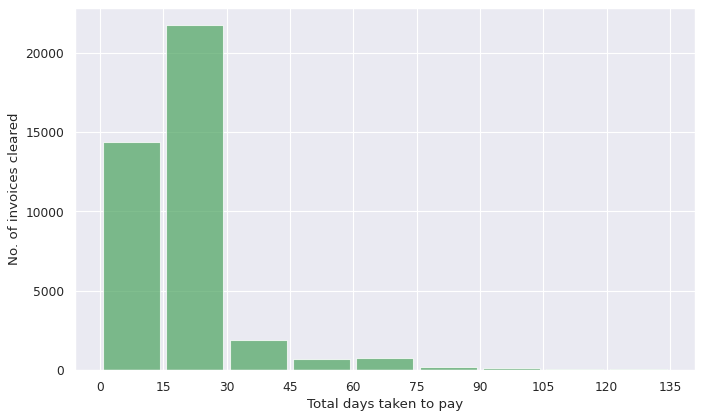

In [ ]:
plt.figure(figsize=(10,6), dpi=80)
n, bins, patches = plt.hist(temp["Total_no_days_taken"], bins = bin, rwidth = 0.9, facecolor='g', alpha=0.75)
plt.xlabel("Total days taken to pay")
plt.ylabel("No. of invoices cleared")
plt.xticks(bin)
plt.grid(True)
plt.show()

In [ ]:
#This means majority of invoices are cleared within 40 days of creation

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})

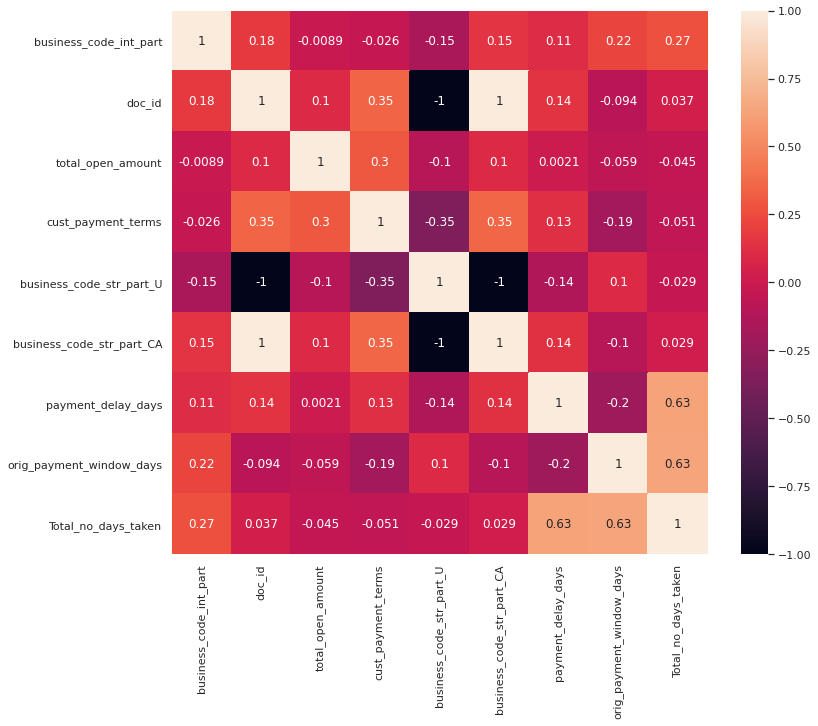

In [ ]:
sns.heatmap(temp.corr(), annot = True)

In [ ]:
temp['create_month'] = pd.DatetimeIndex(temp['document_create_date.1']).month 
temp['create_weekDay'] = pd.DatetimeIndex(temp['document_create_date.1']).weekday 
temp['create_day'] = pd.DatetimeIndex(temp['document_create_date.1']).day
temp['due_in_month'] = pd.DatetimeIndex(temp['due_in_date']).month 
temp['due_in_weekDay'] = pd.DatetimeIndex(temp['due_in_date']).weekday
temp.head()

,business_code_int_part,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA,payment_delay_days,orig_payment_window_days,Total_no_days_taken,create_month,create_weekDay,create_day,due_in_month,due_in_weekDay
0,1,0200797452,US,2019-03-20,1.928860e+09,2019-02-26,2019-03-18,55632.230000,23190.90,1.0,0.0,2,20,22,2,1,26,3,0
1,2,0140105686,SYSC foundation,2019-12-19,2.960597e+09,2019-11-30,2019-12-15,33033.654841,44592.92,0.0,1.0,4,15,19,11,5,30,12,6
2,1,0200705742,DOT co,2019-12-03,1.930166e+09,2019-11-18,2019-12-03,38198.660000,36979.72,1.0,0.0,0,15,15,11,0,18,12,1
3,1,0200881076,ALBERT associates,2020-01-17,1.930347e+09,2020-01-02,2020-01-17,86230.750000,36979.72,1.0,0.0,0,15,15,1,3,2,1,4
4,1,0200486270,BAR llc,2019-08-14,1.929651e+09,2019-07-30,2019-08-14,4660.000000,36979.72,1.0,0.0,0,15,15,7,1,30,8,2


In [ ]:
dfValidation['create_month'] = pd.DatetimeIndex(dfValidation['document_create_date.1']).month 
dfValidation['create_weekDay'] = pd.DatetimeIndex(dfValidation['document_create_date.1']).weekday 
dfValidation['create_day'] = pd.DatetimeIndex(dfValidation['document_create_date.1']).day
dfValidation['due_in_month'] = pd.DatetimeIndex(dfValidation['due_in_date']).month 
dfValidation['due_in_weekDay'] = pd.DatetimeIndex(dfValidation['due_in_date']).weekday
dfValidation.head()

,business_code_int_part,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA,create_month,create_weekDay,create_day,due_in_month,due_in_weekDay
0,13,0100046487,PAPA JOH systems,2019-04-29,1.991825e+09,2019-04-04,2019-04-29,16508.00,16508.00,1.0,0.0,4,3,4,4,0
1,1,0200762301,C&S WH corporation,2019-07-05,1.929514e+09,2019-06-20,2019-07-05,5322.71,51876.69,1.0,0.0,6,3,20,7,4
2,1,0200704858,WAKE associates,2019-05-29,1.929301e+09,2019-05-13,2019-05-28,71108.88,36979.72,1.0,0.0,5,0,13,5,1
3,1,0200769623,WAL-MAR corp,2019-08-29,1.929761e+09,2019-08-18,2019-09-02,1414.68,23273.76,1.0,0.0,8,6,18,9,0
4,1,0200726025,MARTI,2019-08-01,1.929660e+09,2019-07-24,2019-08-08,52450.48,36979.72,1.0,0.0,7,2,24,8,3


In [ ]:
dfTest['create_month'] = pd.DatetimeIndex(dfTest['document_create_date.1']).month 
dfTest['create_weekDay'] = pd.DatetimeIndex(dfTest['document_create_date.1']).weekday 
dfTest['create_day'] = pd.DatetimeIndex(dfTest['document_create_date.1']).day
dfTest['due_in_month'] = pd.DatetimeIndex(dfTest['due_in_date']).month 
dfTest['due_in_weekDay'] = pd.DatetimeIndex(dfTest['due_in_date']).weekday
dfTest.head()

,business_code_int_part,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA,create_month,create_weekDay,create_day,due_in_month,due_in_weekDay
0,1,0200769623,WAL-MAR associates,NaT,1.930622e+09,2020-03-09,2020-03-24,14396.96,23273.76,1.0,0.0,3,0,9,3,1
1,1,0200729942,SA systems,NaT,1.930810e+09,2020-04-21,2020-05-06,11629.96,36979.72,1.0,0.0,4,1,21,5,2
2,1,0200769623,WAL-MAR associates,NaT,1.930711e+09,2020-03-29,2020-04-13,355.93,23273.76,1.0,0.0,3,6,29,4,0
3,1,0200418007,AM foundation,NaT,1.930717e+09,2020-03-29,2020-06-02,7263.36,13366.28,1.0,0.0,3,6,29,6,1
4,1,0200794332,COST associates,NaT,1.930595e+09,2020-03-04,2020-03-19,39259.89,24163.87,1.0,0.0,3,2,4,3,3


In [ ]:
temp['payment_delay_days'].describe()

count    39838.000000
mean         0.812265
std         10.379153
min        -98.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        159.000000
Name: payment_delay_days, dtype: float64

In order to see how is the distribution we can use sb.distplot to plot it

In [ ]:
temp.corr().loc['payment_delay_days',:]

business_code_int_part       0.110979
doc_id                       0.141017
total_open_amount            0.002130
cust_payment_terms           0.130683
business_code_str_part_U    -0.138378
business_code_str_part_CA    0.138378
payment_delay_days           1.000000
orig_payment_window_days    -0.204687
Total_no_days_taken          0.626865
create_month                -0.037180
create_weekDay               0.001240
create_day                  -0.010998
due_in_month                -0.038179
due_in_weekDay               0.024893
Name: payment_delay_days, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


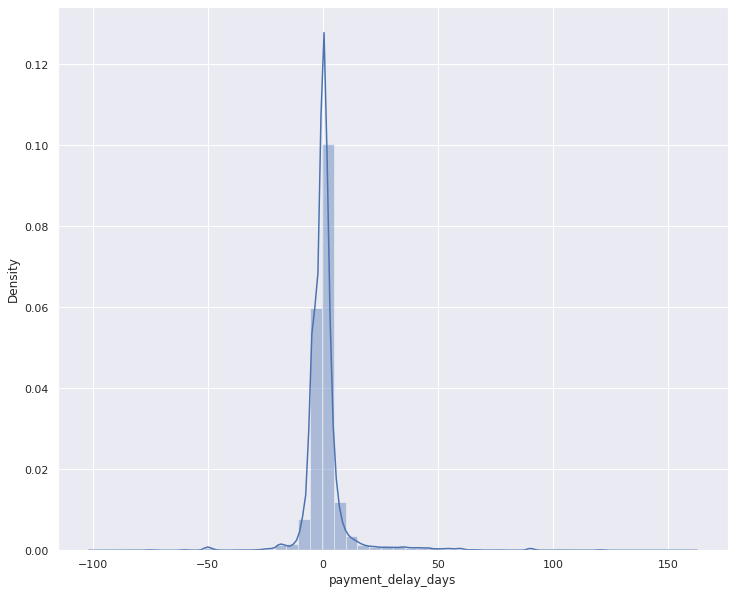

In [ ]:
sns.distplot(temp['payment_delay_days'])

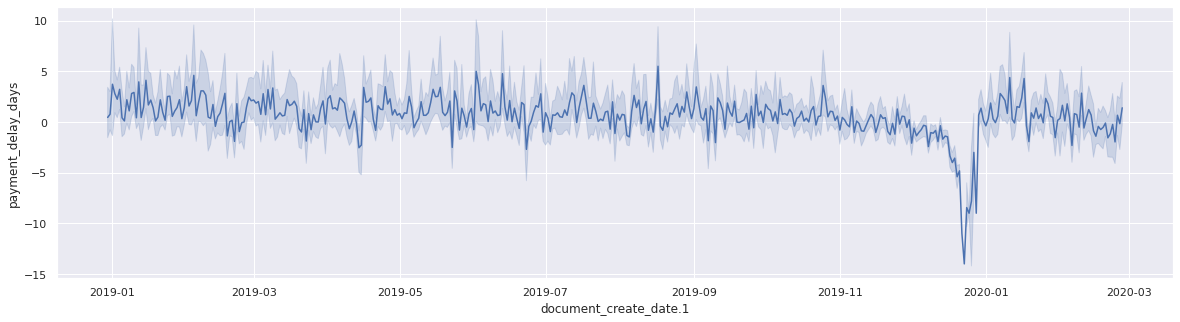

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x=temp['document_create_date.1'], y=temp['payment_delay_days'])
plt.show()

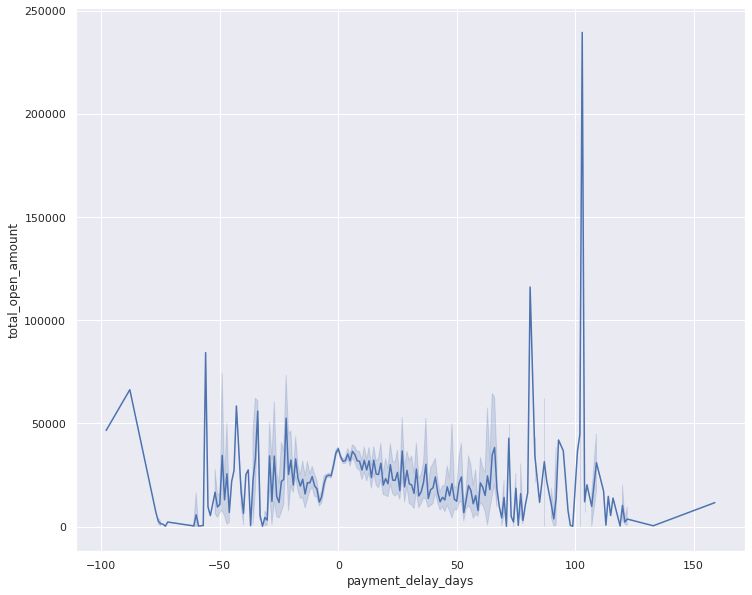

In [ ]:
sns.lineplot(x=temp['payment_delay_days'],y=temp['total_open_amount'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


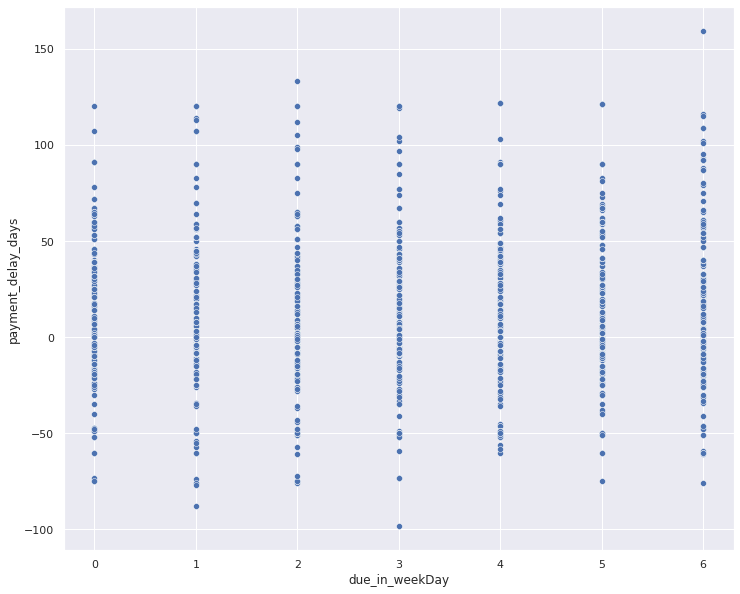

In [ ]:
sns.scatterplot(temp['due_in_weekDay'],temp['payment_delay_days'])
plt.show()

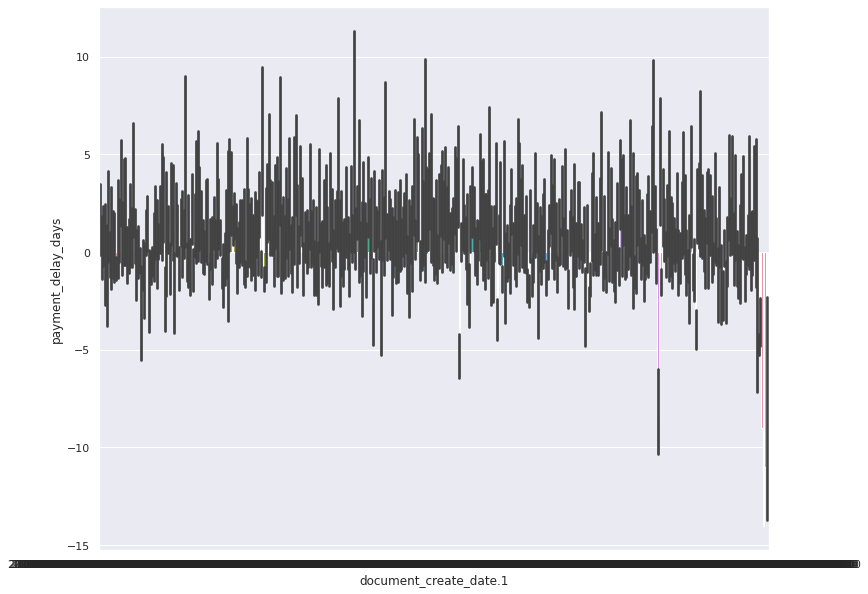

In [ ]:
sns.barplot(x=temp['document_create_date.1'], y=temp['payment_delay_days'])
plt.show()

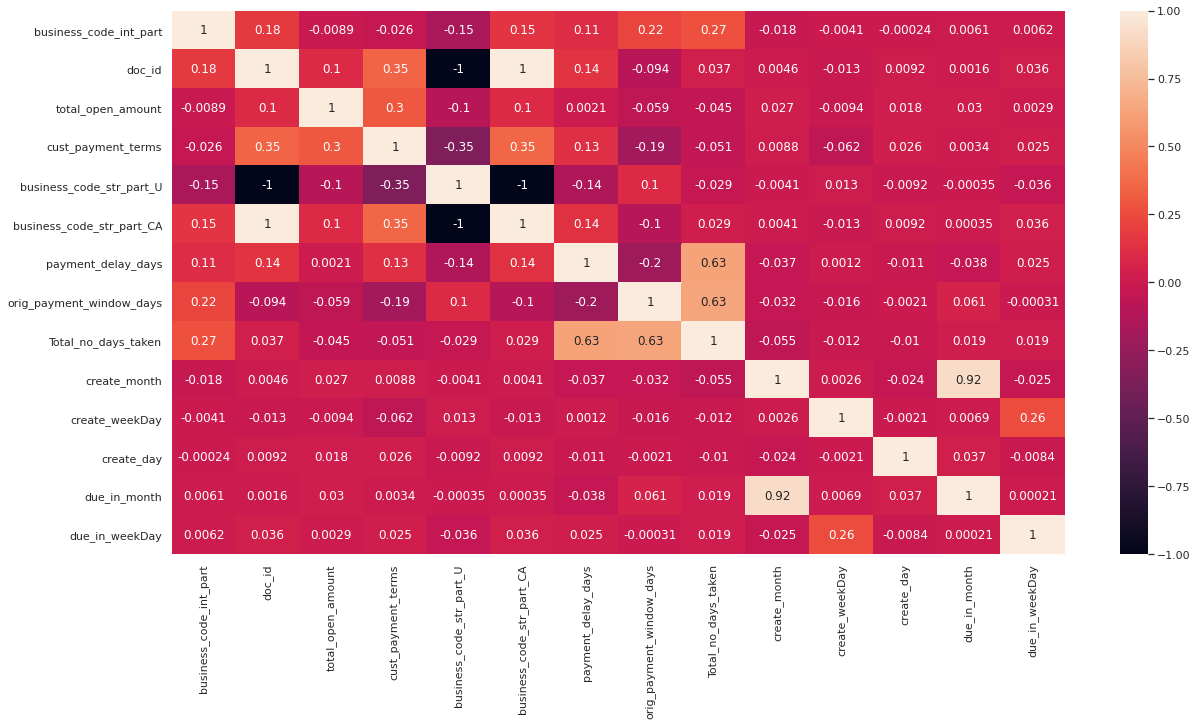

In [ ]:
corr=temp.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
temp.columns

Index(['business_code_int_part', 'cust_number', 'name_customer', 'clear_date',
       'doc_id', 'document_create_date.1', 'due_in_date', 'total_open_amount',
       'cust_payment_terms', 'business_code_str_part_U',
       'business_code_str_part_CA', 'payment_delay_days',
       'orig_payment_window_days', 'Total_no_days_taken', 'create_month',
       'create_weekDay', 'create_day', 'due_in_month', 'due_in_weekDay'],
      dtype='object')

In [ ]:
tui_df = temp.drop(columns = ["cust_number", "name_customer"]).copy()
tui_df.columns

Index(['business_code_int_part', 'clear_date', 'doc_id',
       'document_create_date.1', 'due_in_date', 'total_open_amount',
       'cust_payment_terms', 'business_code_str_part_U',
       'business_code_str_part_CA', 'payment_delay_days',
       'orig_payment_window_days', 'Total_no_days_taken', 'create_month',
       'create_weekDay', 'create_day', 'due_in_month', 'due_in_weekDay'],
      dtype='object')

In [ ]:
tui_df.head()

,business_code_int_part,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA,payment_delay_days,orig_payment_window_days,Total_no_days_taken,create_month,create_weekDay,create_day,due_in_month,due_in_weekDay
0,1,2019-03-20,1.928860e+09,2019-02-26,2019-03-18,55632.230000,23190.90,1.0,0.0,2,20,22,2,1,26,3,0
1,2,2019-12-19,2.960597e+09,2019-11-30,2019-12-15,33033.654841,44592.92,0.0,1.0,4,15,19,11,5,30,12,6
2,1,2019-12-03,1.930166e+09,2019-11-18,2019-12-03,38198.660000,36979.72,1.0,0.0,0,15,15,11,0,18,12,1
3,1,2020-01-17,1.930347e+09,2020-01-02,2020-01-17,86230.750000,36979.72,1.0,0.0,0,15,15,1,3,2,1,4
4,1,2019-08-14,1.929651e+09,2019-07-30,2019-08-14,4660.000000,36979.72,1.0,0.0,0,15,15,7,1,30,8,2


In [ ]:
#tui_df["payment_delay_days"] = tui_df["clear_date"].sub(tui_df["due_in_date"]).dt.days.copy()
#tui_df["orig_payment_window_days"] = tui_df["due_in_date"].sub(tui_df["document_create_date.1"]).dt.days.copy()

In [ ]:
tui_df_Y = tui_df["payment_delay_days"]
tui_df_X = tui_df.drop(columns = ["payment_delay_days", "clear_date", "document_create_date.1", "due_in_date"]).copy()

In [ ]:
dfValidation["Total_no_days_taken"]=dfValidation["clear_date"].sub(dfValidation["document_create_date.1"]).dt.days.copy()
tui_val1_df = dfValidation.drop(columns = ["cust_number", "name_customer"]).copy()


tui_val1_df["total_open_amount"] = tui_val1_df["total_open_amount"].map(lambda x : round(x, 2))
tui_val1_df["payment_delay_days"] = tui_val1_df["clear_date"].sub(tui_val1_df["due_in_date"]).dt.days.copy()
tui_val1_df["orig_payment_window_days"] = tui_val1_df["due_in_date"].sub(tui_val1_df["document_create_date.1"]).dt.days.copy()

tui_val1_df_Y = tui_val1_df["payment_delay_days"]
tui_val1_df_X = tui_val1_df.drop(columns = ["payment_delay_days", "clear_date", "document_create_date.1", "due_in_date"]).copy()

In [ ]:
dfTest.head()

,business_code_int_part,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA,create_month,create_weekDay,create_day,due_in_month,due_in_weekDay
0,1,0200769623,WAL-MAR associates,NaT,1.930622e+09,2020-03-09,2020-03-24,14396.96,23273.76,1.0,0.0,3,0,9,3,1
1,1,0200729942,SA systems,NaT,1.930810e+09,2020-04-21,2020-05-06,11629.96,36979.72,1.0,0.0,4,1,21,5,2
2,1,0200769623,WAL-MAR associates,NaT,1.930711e+09,2020-03-29,2020-04-13,355.93,23273.76,1.0,0.0,3,6,29,4,0
3,1,0200418007,AM foundation,NaT,1.930717e+09,2020-03-29,2020-06-02,7263.36,13366.28,1.0,0.0,3,6,29,6,1
4,1,0200794332,COST associates,NaT,1.930595e+09,2020-03-04,2020-03-19,39259.89,24163.87,1.0,0.0,3,2,4,3,3


In [ ]:
#from datetime import date
dfTest["Total_no_days_taken"]=dfTest["due_in_date"].sub(dfTest["document_create_date.1"]).dt.days.copy()

tui_test1_df = dfTest.drop(columns = ["cust_number", "name_customer"]).copy()


tui_test1_df["total_open_amount"] = tui_test1_df["total_open_amount"].map(lambda x : round(x, 2))
tui_test1_df["orig_payment_window_days"] = tui_test1_df["due_in_date"].sub(tui_test1_df["document_create_date.1"]).dt.days.copy()

tui_test1_df_X = tui_test1_df.drop(columns = ["clear_date", "document_create_date.1", "due_in_date"]).copy()


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []

In [ ]:
X_train = tui_df_X.copy()
y_train = tui_df_Y.copy()
X_test = tui_val1_df_X.copy()
y_test = tui_val1_df_Y.copy()
X_finaltest = tui_test1_df_X.copy()

In [ ]:
X_test.head()

,business_code_int_part,doc_id,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA,create_month,create_weekDay,create_day,due_in_month,due_in_weekDay,Total_no_days_taken,orig_payment_window_days
0,13,1.991825e+09,16508.00,16508.00,1.0,0.0,4,3,4,4,0,25,25
1,1,1.929514e+09,5322.71,51876.69,1.0,0.0,6,3,20,7,4,15,15
2,1,1.929301e+09,71108.88,36979.72,1.0,0.0,5,0,13,5,1,16,15
3,1,1.929761e+09,1414.68,23273.76,1.0,0.0,8,6,18,9,0,11,15
4,1,1.929660e+09,52450.48,36979.72,1.0,0.0,7,2,24,8,3,8,15


In [ ]:
X_train.head()

,business_code_int_part,doc_id,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA,orig_payment_window_days,Total_no_days_taken,create_month,create_weekDay,create_day,due_in_month,due_in_weekDay
0,1,1.928860e+09,55632.230000,23190.90,1.0,0.0,20,22,2,1,26,3,0
1,2,2.960597e+09,33033.654841,44592.92,0.0,1.0,15,19,11,5,30,12,6
2,1,1.930166e+09,38198.660000,36979.72,1.0,0.0,15,15,11,0,18,12,1
3,1,1.930347e+09,86230.750000,36979.72,1.0,0.0,15,15,1,3,2,1,4
4,1,1.929651e+09,4660.000000,36979.72,1.0,0.0,15,15,7,1,30,8,2


In [ ]:
y_test.head()

0    0
1    0
2    1
3   -4
4   -7
Name: payment_delay_days, dtype: int64

In [ ]:
y_train.head()

0    2
1    4
2    0
3    0
4    0
Name: payment_delay_days, dtype: int64

In [ ]:
X_train.sort_index(inplace=True,axis=1)
X_test.sort_index(inplace=True,axis=1)
X_finaltest.sort_index(inplace=True,axis=1)


In [ ]:
X_train.head()

,Total_no_days_taken,business_code_int_part,business_code_str_part_CA,business_code_str_part_U,create_day,create_month,create_weekDay,cust_payment_terms,doc_id,due_in_month,due_in_weekDay,orig_payment_window_days,total_open_amount
0,22,1,0.0,1.0,26,2,1,23190.90,1.928860e+09,3,0,20,55632.230000
1,19,2,1.0,0.0,30,11,5,44592.92,2.960597e+09,12,6,15,33033.654841
2,15,1,0.0,1.0,18,11,0,36979.72,1.930166e+09,12,1,15,38198.660000
3,15,1,0.0,1.0,2,1,3,36979.72,1.930347e+09,1,4,15,86230.750000
4,15,1,0.0,1.0,30,7,1,36979.72,1.929651e+09,8,2,15,4660.000000


In [ ]:
X_test.head()

,Total_no_days_taken,business_code_int_part,business_code_str_part_CA,business_code_str_part_U,create_day,create_month,create_weekDay,cust_payment_terms,doc_id,due_in_month,due_in_weekDay,orig_payment_window_days,total_open_amount
0,25,13,0.0,1.0,4,4,3,16508.00,1.991825e+09,4,0,25,16508.00
1,15,1,0.0,1.0,20,6,3,51876.69,1.929514e+09,7,4,15,5322.71
2,16,1,0.0,1.0,13,5,0,36979.72,1.929301e+09,5,1,15,71108.88
3,11,1,0.0,1.0,18,8,6,23273.76,1.929761e+09,9,0,15,1414.68
4,8,1,0.0,1.0,24,7,2,36979.72,1.929660e+09,8,3,15,52450.48


In [ ]:
X_finaltest.head()

,Total_no_days_taken,business_code_int_part,business_code_str_part_CA,business_code_str_part_U,create_day,create_month,create_weekDay,cust_payment_terms,doc_id,due_in_month,due_in_weekDay,orig_payment_window_days,total_open_amount
0,15,1,0.0,1.0,9,3,0,23273.76,1.930622e+09,3,1,15,14396.96
1,15,1,0.0,1.0,21,4,1,36979.72,1.930810e+09,5,2,15,11629.96
2,15,1,0.0,1.0,29,3,6,23273.76,1.930711e+09,4,0,15,355.93
3,65,1,0.0,1.0,29,3,6,13366.28,1.930717e+09,6,1,65,7263.36
4,15,1,0.0,1.0,4,3,2,24163.87,1.930595e+09,3,3,15,39259.89


In [ ]:
### **1. Linear Regression**

# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### **2. Support Vector Regression**

# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### **3. Decision Tree Regressor**

# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### **4. Random Forest Regressor**

# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### **5. XGB Regressor**

# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

## Score Card of the Models' Performances

# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

# Score Card
Comparison

[13:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Algorithm,MSE_Score,R2_Score
0,Linear Regression,3.385032e-26,1.000000
1,Support Vector Regression,1.186085e+02,0.016127
2,Decision Tree Regressor,2.109737e+00,0.982499
3,Random Forest Regressor,1.223522e+00,0.989851
4,XGB Regressor,1.972772e+00,0.983636


In [ ]:
#choosing Decision Tree Regresser
X_finaltest

,Total_no_days_taken,business_code_int_part,business_code_str_part_CA,business_code_str_part_U,create_day,create_month,create_weekDay,cust_payment_terms,doc_id,due_in_month,due_in_weekDay,orig_payment_window_days,total_open_amount
0,15,1,0.0,1.0,9,3,0,23273.76,1.930622e+09,3,1,15,14396.96
1,15,1,0.0,1.0,21,4,1,36979.72,1.930810e+09,5,2,15,11629.96
2,15,1,0.0,1.0,29,3,6,23273.76,1.930711e+09,4,0,15,355.93
3,65,1,0.0,1.0,29,3,6,13366.28,1.930717e+09,6,1,65,7263.36
4,15,1,0.0,1.0,4,3,2,24163.87,1.930595e+09,3,3,15,39259.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,15,1,0.0,1.0,28,4,1,36979.72,1.930834e+09,5,2,15,89299.75
3092,15,1,0.0,1.0,7,3,5,36979.72,1.930607e+09,3,6,15,49545.65
3093,15,1,0.0,1.0,20,3,4,23273.76,1.930675e+09,4,5,15,17682.72
3094,20,1,0.0,1.0,18,3,2,23190.90,1.930668e+09,4,1,20,11102.62


In [ ]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
prediction = clf.predict(X_finaltest)
print(len(prediction))
dfTest['payment_delay_days']=prediction
#dfCopyTest["clear_date"]=(dfCopyTest["due_in_date"])+timedelta(days=dfTest["payment_delay_days"])
#dfcopyTest


3096


In [ ]:
dfTest.head()

,business_code_int_part,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA,create_month,create_weekDay,create_day,due_in_month,due_in_weekDay,Total_no_days_taken,payment_delay_days
0,1,0200769623,WAL-MAR associates,NaT,1.930622e+09,2020-03-09,2020-03-24,14396.96,23273.76,1.0,0.0,3,0,9,3,1,15,0.0
1,1,0200729942,SA systems,NaT,1.930810e+09,2020-04-21,2020-05-06,11629.96,36979.72,1.0,0.0,4,1,21,5,2,15,0.0
2,1,0200769623,WAL-MAR associates,NaT,1.930711e+09,2020-03-29,2020-04-13,355.93,23273.76,1.0,0.0,3,6,29,4,0,15,0.0
3,1,0200418007,AM foundation,NaT,1.930717e+09,2020-03-29,2020-06-02,7263.36,13366.28,1.0,0.0,3,6,29,6,1,65,0.0
4,1,0200794332,COST associates,NaT,1.930595e+09,2020-03-04,2020-03-19,39259.89,24163.87,1.0,0.0,3,2,4,3,3,15,0.0


In [ ]:
""" The different Ageing buckets will be :
● 0-15 days
● 16-30 days
● 31-45 days
● 46-60 days
● Greater than 60 days"""

' The different Ageing buckets will be :\n● 0-15 days\n● 16-30 days\n● 31-45 days\n● 46-60 days\n● Greater than 60 days'

In [ ]:
bins=[-60,15,30,45,60,1000]
labels=[0,1,2,3,4]
dfTest['bins']=pd.cut(dfTest['payment_delay_days'],bins=bins,labels=labels,include_lowest=False)

In [ ]:
#import pandas as pd
#dfcopyTest["clear_date"]=(dfcopyTest["due_in_date"])+timedelta(days=dfTest["payment_delay_days"])
#dfcopyTest=pd.dataFrame()
"""
for row in dfcopyTest.iterrows():
  row["clear_date"]=(rows["due_in_date"])+timedelta(days=row["payment_delay_days"])"""

'\nfor row in dfcopyTest.iterrows():\n  row["clear_date"]=(rows["due_in_date"])+timedelta(days=row["payment_delay_days"])'

In [ ]:
dfTest.head()

,business_code_int_part,cust_number,name_customer,clear_date,doc_id,document_create_date.1,due_in_date,total_open_amount,cust_payment_terms,business_code_str_part_U,business_code_str_part_CA,create_month,create_weekDay,create_day,due_in_month,due_in_weekDay,Total_no_days_taken,payment_delay_days,bins
0,1,0200769623,WAL-MAR associates,NaT,1.930622e+09,2020-03-09,2020-03-24,14396.96,23273.76,1.0,0.0,3,0,9,3,1,15,0.0,0
1,1,0200729942,SA systems,NaT,1.930810e+09,2020-04-21,2020-05-06,11629.96,36979.72,1.0,0.0,4,1,21,5,2,15,0.0,0
2,1,0200769623,WAL-MAR associates,NaT,1.930711e+09,2020-03-29,2020-04-13,355.93,23273.76,1.0,0.0,3,6,29,4,0,15,0.0,0
3,1,0200418007,AM foundation,NaT,1.930717e+09,2020-03-29,2020-06-02,7263.36,13366.28,1.0,0.0,3,6,29,6,1,65,0.0,0
4,1,0200794332,COST associates,NaT,1.930595e+09,2020-03-04,2020-03-19,39259.89,24163.87,1.0,0.0,3,2,4,3,3,15,0.0,0


In [ ]:
dfTest.payment_delay_days.unique()

array([ 0.,  1., 19., -8., -1., -5., -6., -2.,  6.,  8., 22., 52.,  2.])

In [ ]:
dfTest.bins.unique()

[0, 1, 3]
Categories (3, int64): [0 < 1 < 3]

In [ ]:
dfTest.bins

0       0
1       0
2       0
3       0
4       0
       ..
3091    0
3092    0
3093    0
3094    0
3095    0
Name: bins, Length: 3096, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [ ]:
len(dfTest.bins.isna()) # all columns are allocated bags

3096

In [ ]:
from datetime import timedelta
#clr_dates=dfcopyTest["clear_date"].tolist()
due_date=dfcopyTest["due_in_date"].tolist()
days_add=dfTest["payment_delay_days"].tolist()
#print(len(due_date))
#print(len(days_add))

for ind in range(len(due_date)):
  #dfcopyTest["clear_date"]
  predictedPaymentDate=[]
  datetimeObj = datetime.datetime.strptime(str((due_date[ind])+timedelta(days=days_add[ind])), '%Y-%m-%d %H:%M:%S')
  print(datetimeObj)

  

2020-03-24 00:00:00
2020-05-06 00:00:00
2020-04-13 00:00:00
2020-06-02 00:00:00
2020-03-19 00:00:00
2020-03-30 00:00:00
2020-05-07 00:00:00
2020-05-05 00:00:00
2020-05-10 00:00:00
2020-04-10 00:00:00
2020-04-22 00:00:00
2020-04-03 00:00:00
2020-05-05 00:00:00
2020-04-07 00:00:00
2020-03-25 00:00:00
2020-03-15 00:00:00
2020-03-20 00:00:00
2020-04-11 00:00:00
2020-04-22 00:00:00
2020-04-05 00:00:00
2020-05-08 00:00:00
2020-06-06 00:00:00
2020-04-17 00:00:00
2020-05-11 00:00:00
2020-03-30 00:00:00
2020-05-02 00:00:00
2020-05-02 00:00:00
2020-04-11 00:00:00
2020-03-09 00:00:00
2020-03-31 00:00:00
2020-04-21 00:00:00
2020-05-02 00:00:00
2020-03-20 00:00:00
2020-03-17 00:00:00
2020-05-09 00:00:00
2020-04-19 00:00:00
2020-03-13 00:00:00
2020-04-18 00:00:00
2020-05-02 00:00:00
2020-03-22 00:00:00
2020-04-22 00:00:00
2020-05-09 00:00:00
2020-04-14 00:00:00
2020-04-03 00:00:00
2020-04-09 00:00:00
2020-04-21 00:00:00
2020-04-06 00:00:00
2020-04-29 00:00:00
2020-03-14 00:00:00
2020-04-24 00:00:00
